# Lab#4- Jaide Swanson

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = np.array(hf.get('data'))

In [5]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [6]:
hf.close()

## Problem 1

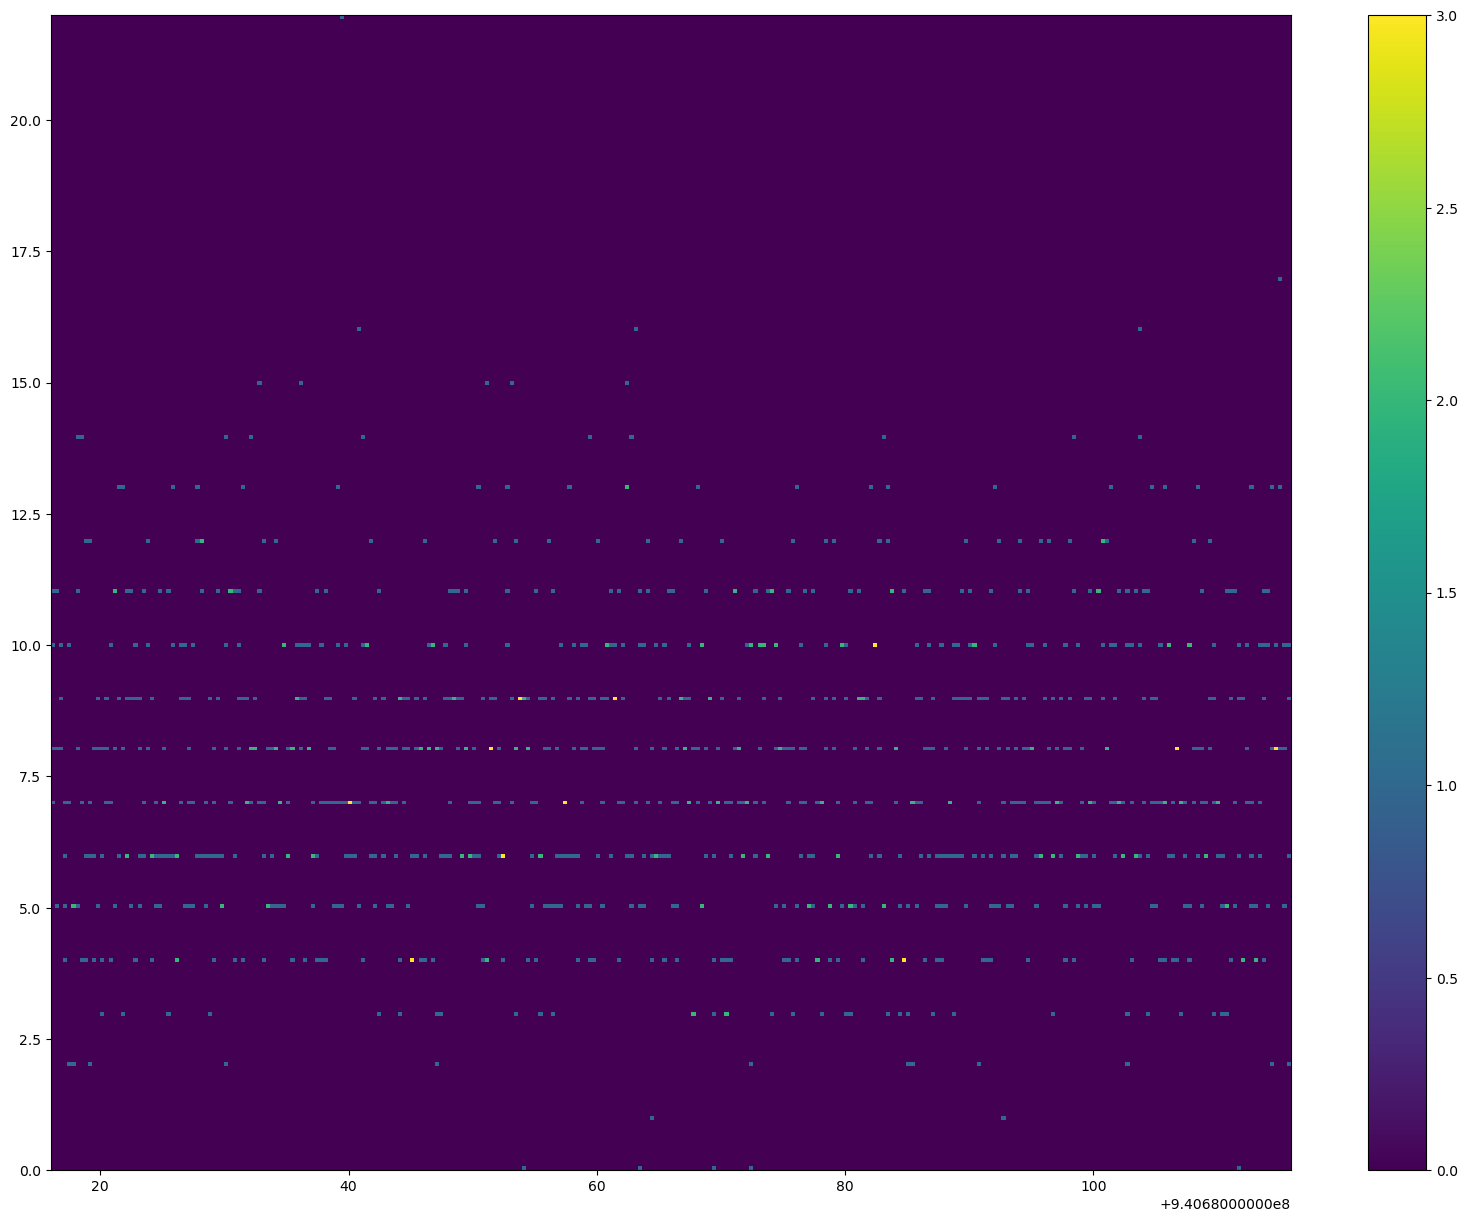

In [7]:
fig, ax = plt.subplots(1, 1)
h=ax.hist2d(data[0][0:1000],data[3][0:1000],bins=(300,300))
plt.colorbar(h[3],ax=ax)
plt.show()

(940680016.0, 940700016.0)

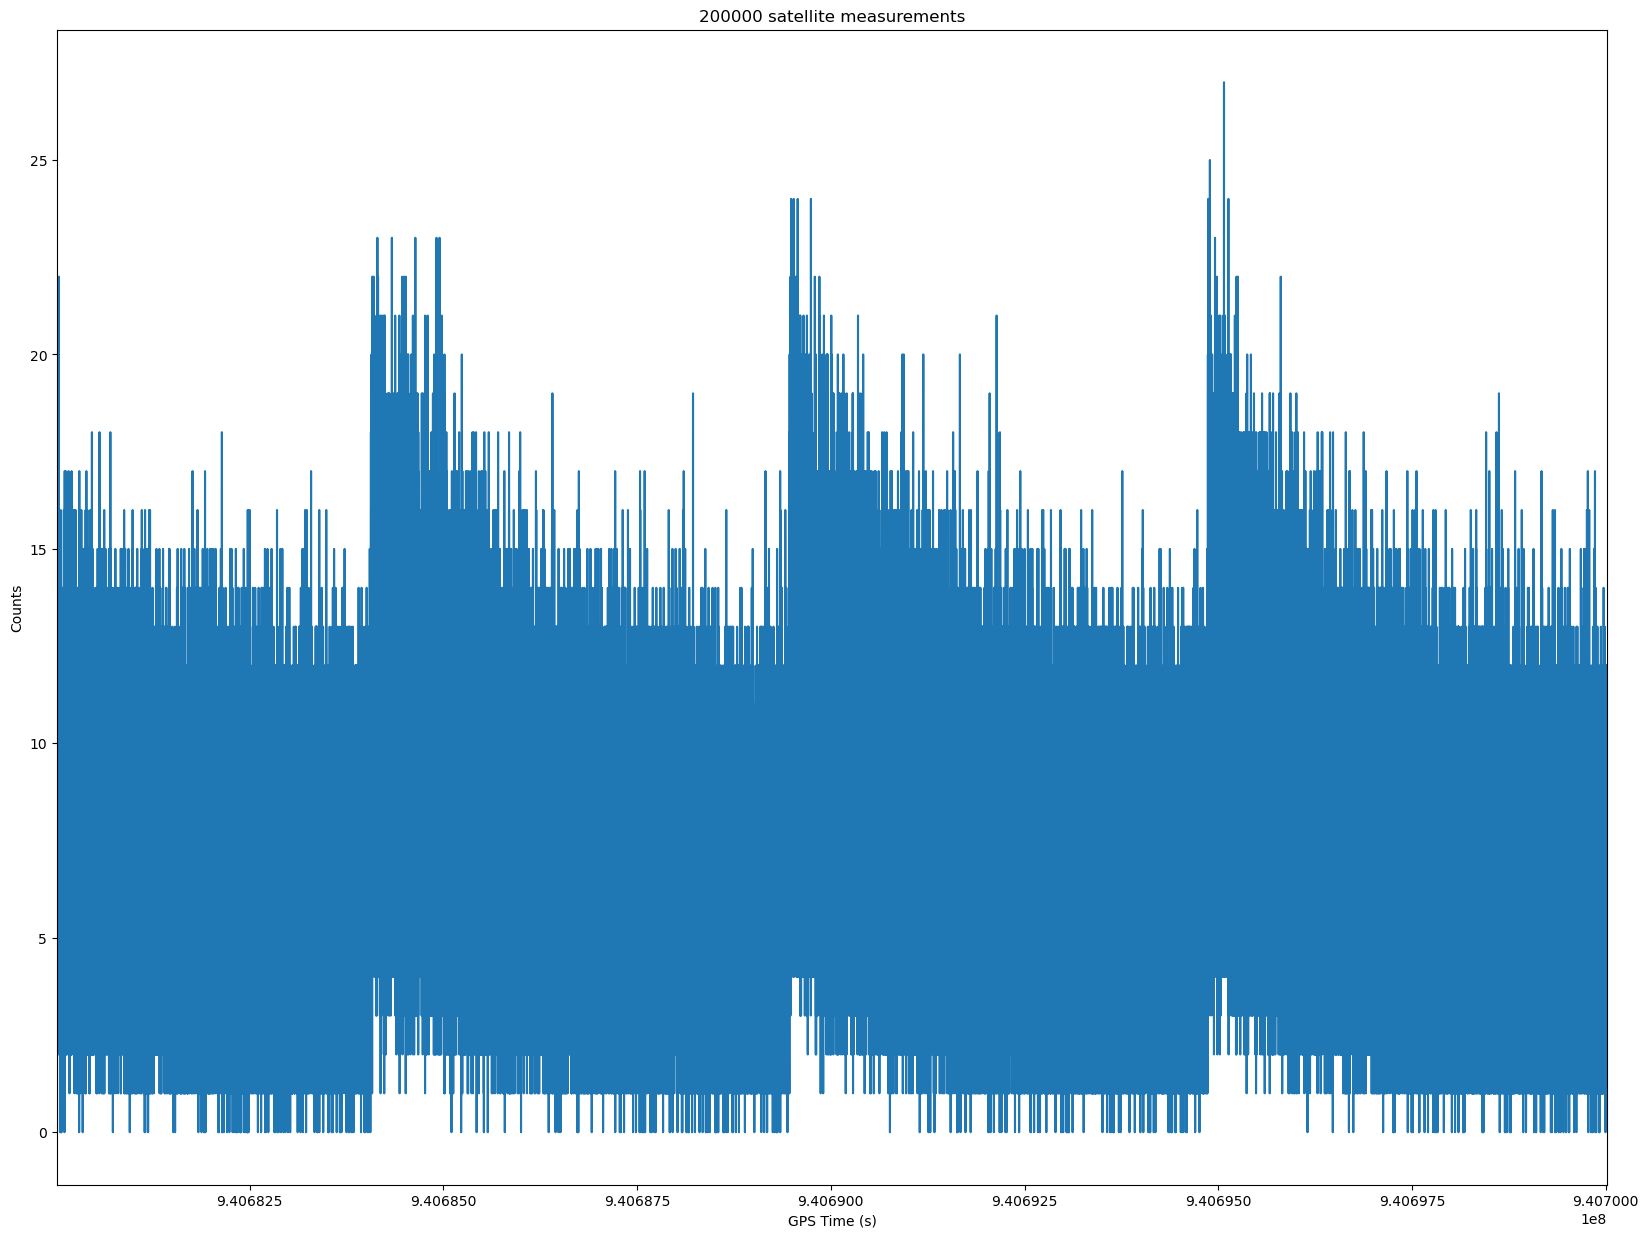

In [8]:
points = 200000
plt.title(f"{points} satellite measurements")
plt.xlabel('GPS Time (s)')
plt.ylabel('Counts')
plt.plot(data[0][0:points], data[3][0:points]);
plt.xlim(data[0][0], data[0][points])

Plotting the data of the time vs particles counts as both a histogram and regular plot we can see that that it is definitely periodic with spikes in the data. This leads us to ask what is causing these periodic spikes such as the solar phase or location of the satellite based on the Earth's longitude. These can be examined by making plots with the given metadata. 

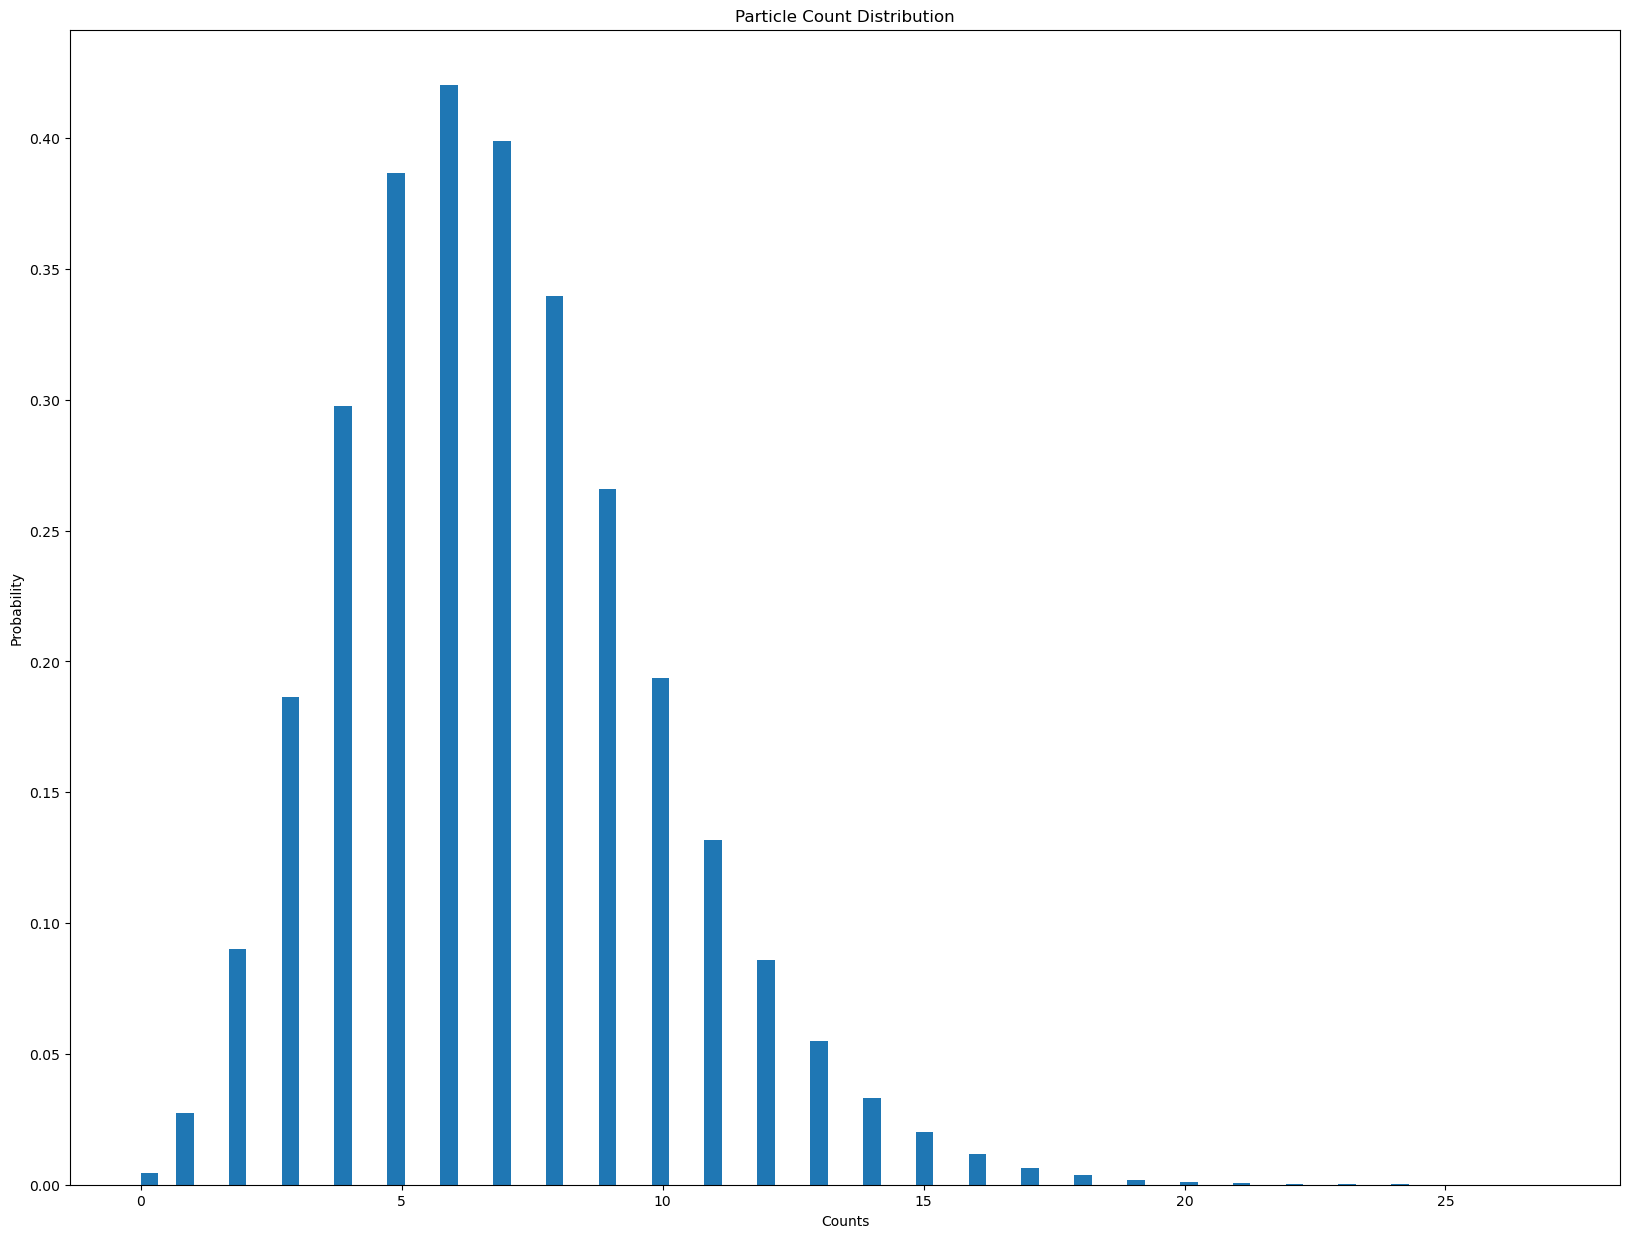

In [11]:
plt.title('Particle Count Distribution')
plt.xlabel('Counts')
plt.ylabel('Probability')
plt.hist(counts[0:points], bins=80, density=True);

Plotting a histogram of the particle counts we can see that it is a discrete distribution which is to be suspected for this data and it resembles that of a poisson distribution which is consistent with it being discrete. 

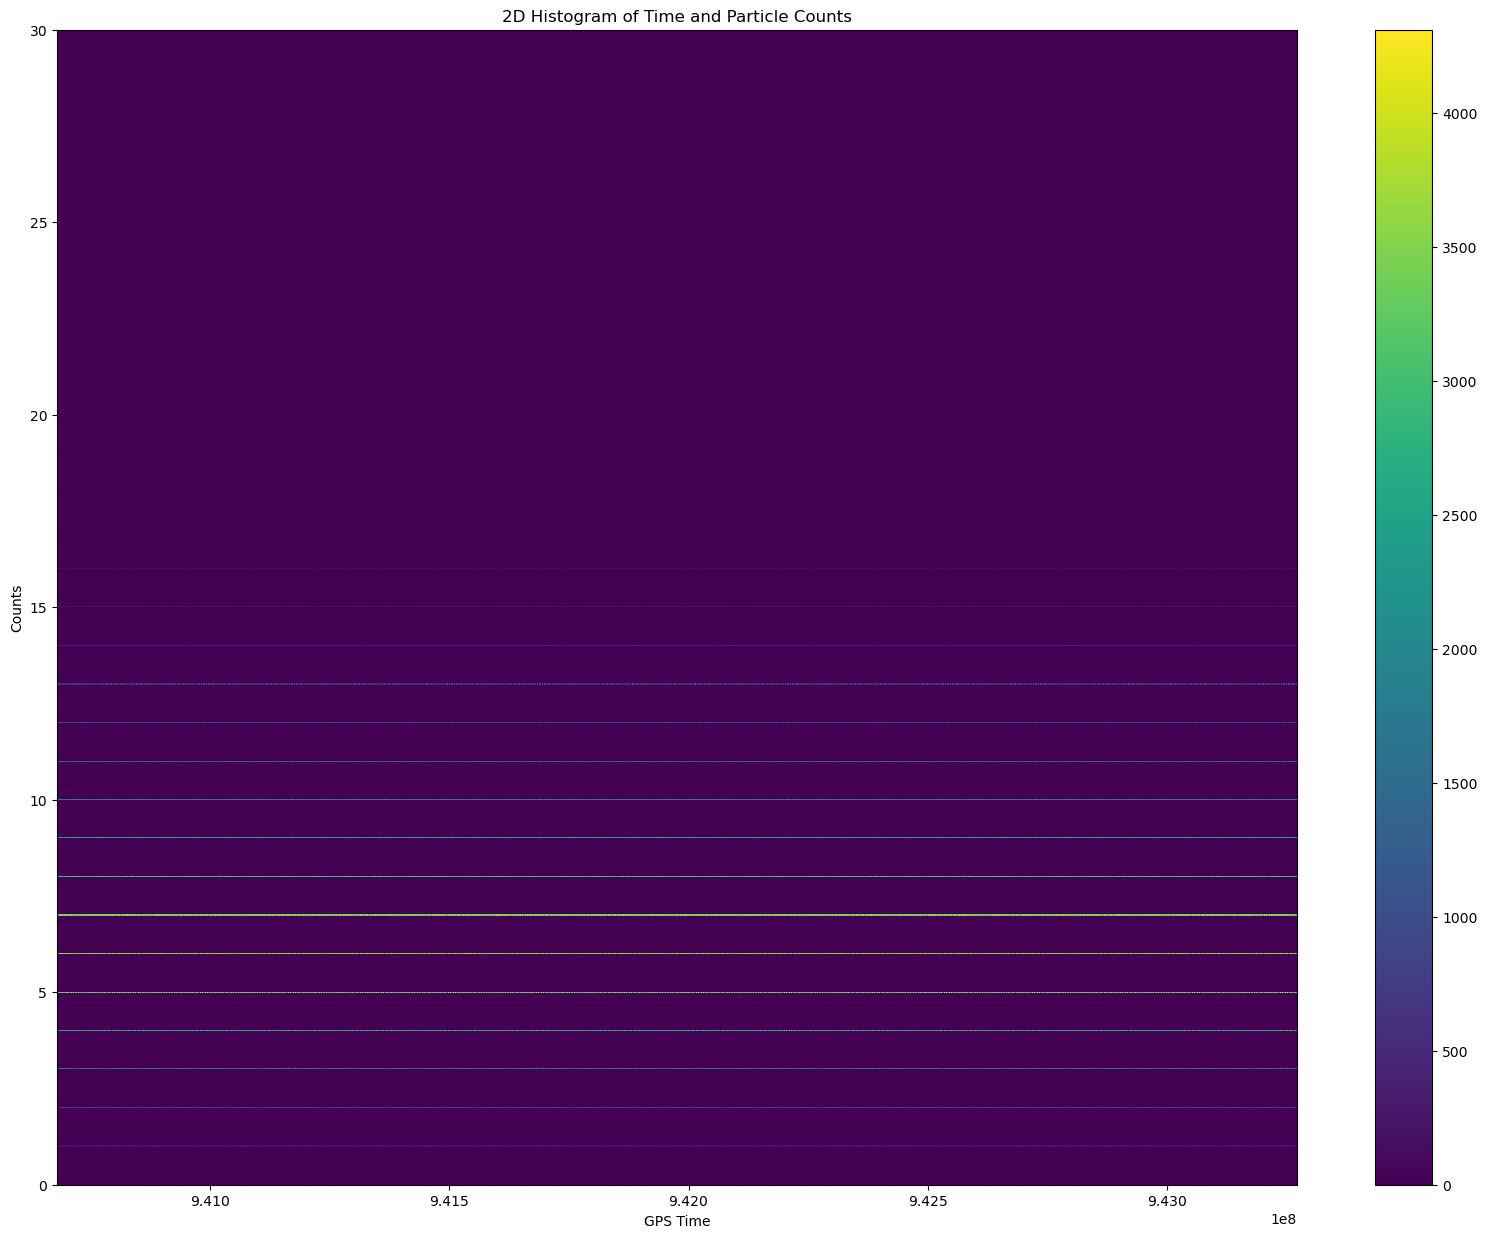

In [13]:
fig, ax = plt.subplots(1, 1)
h=ax.hist2d(data[0],data[3],bins=(1000,1000))
plt.title('2D Histogram of Time and Particle Counts')
plt.xlabel('GPS Time')
plt.ylabel('Counts')
plt.colorbar(h[3],ax=ax)
plt.show()

In [10]:
t=data[0]
long=data[2]
solar_phase=data[1]
counts= data[3]

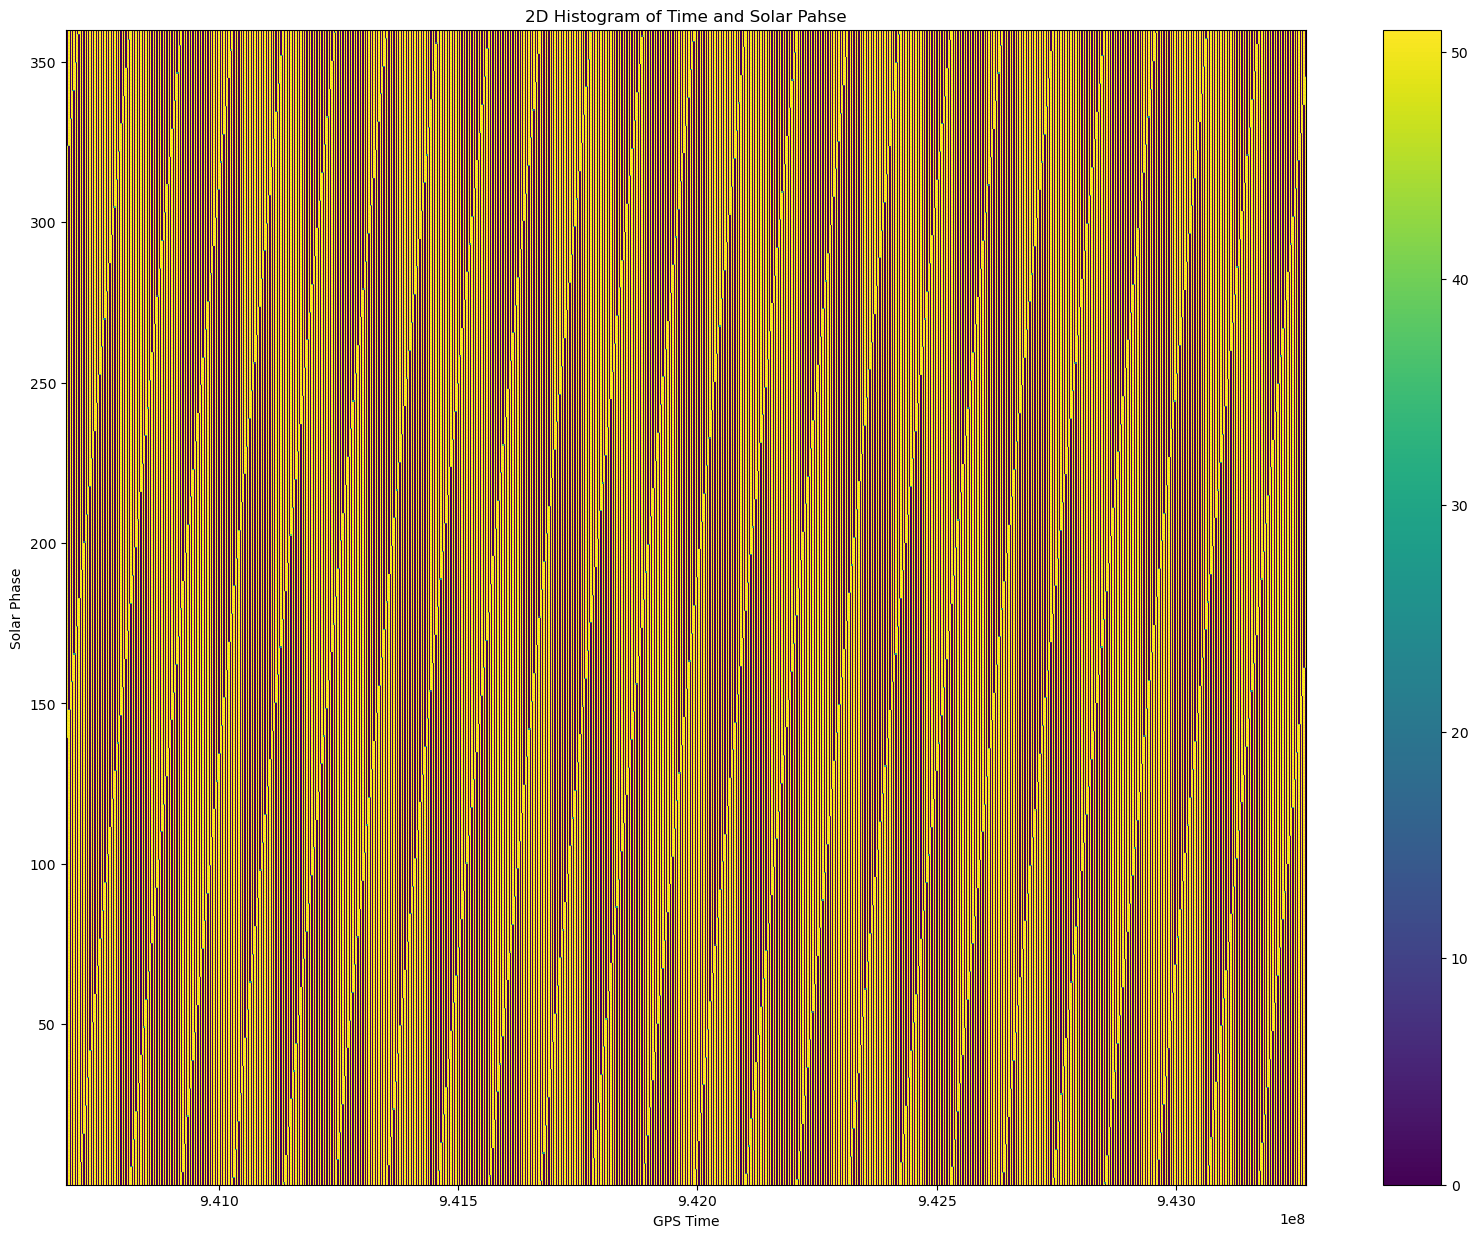

In [14]:
fig, ax = plt.subplots(1, 1)
h=ax.hist2d(t,solar_phase,bins=(1000,1000))
plt.title('2D Histogram of Time and Solar Pahse')
plt.xlabel('GPS Time')
plt.ylabel('Solar Phase')
plt.colorbar(h[3],ax=ax)
plt.show()

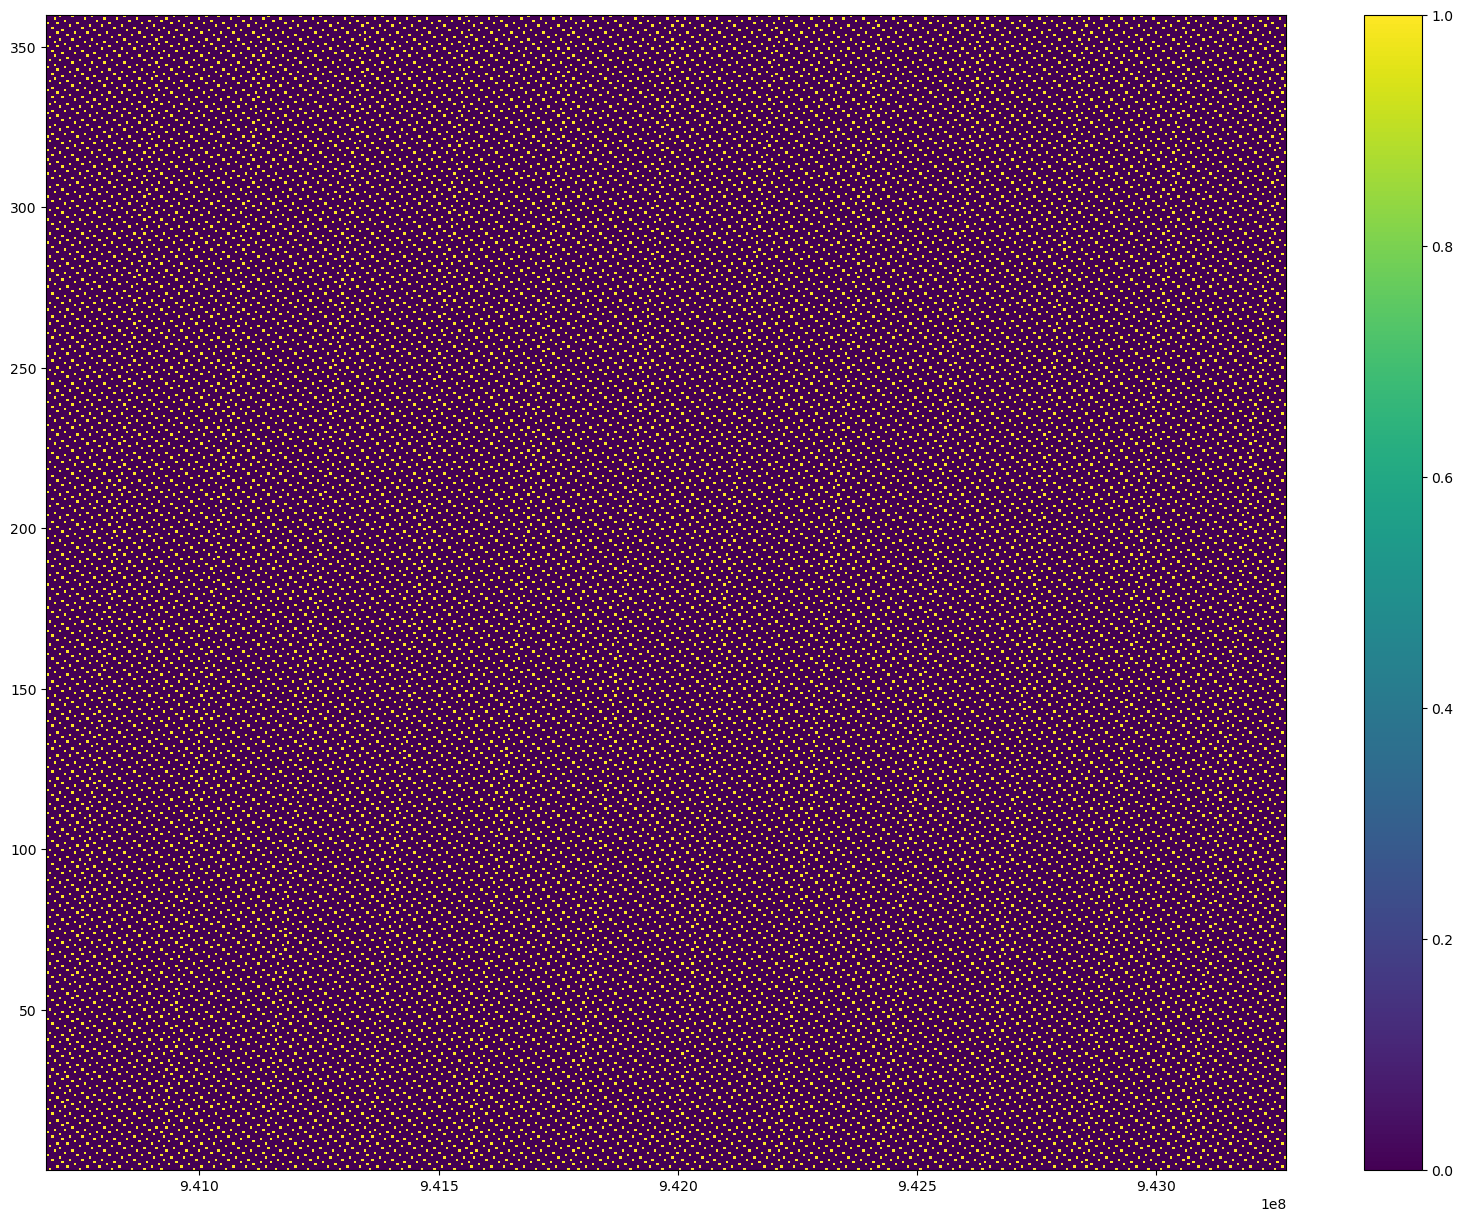

In [15]:
fig, ax = plt.subplots(1, 1)
h=ax.hist2d(data[0][::1000],data[1][::1000],bins=(500,500))

plt.colorbar(h[3],ax=ax)
plt.show()

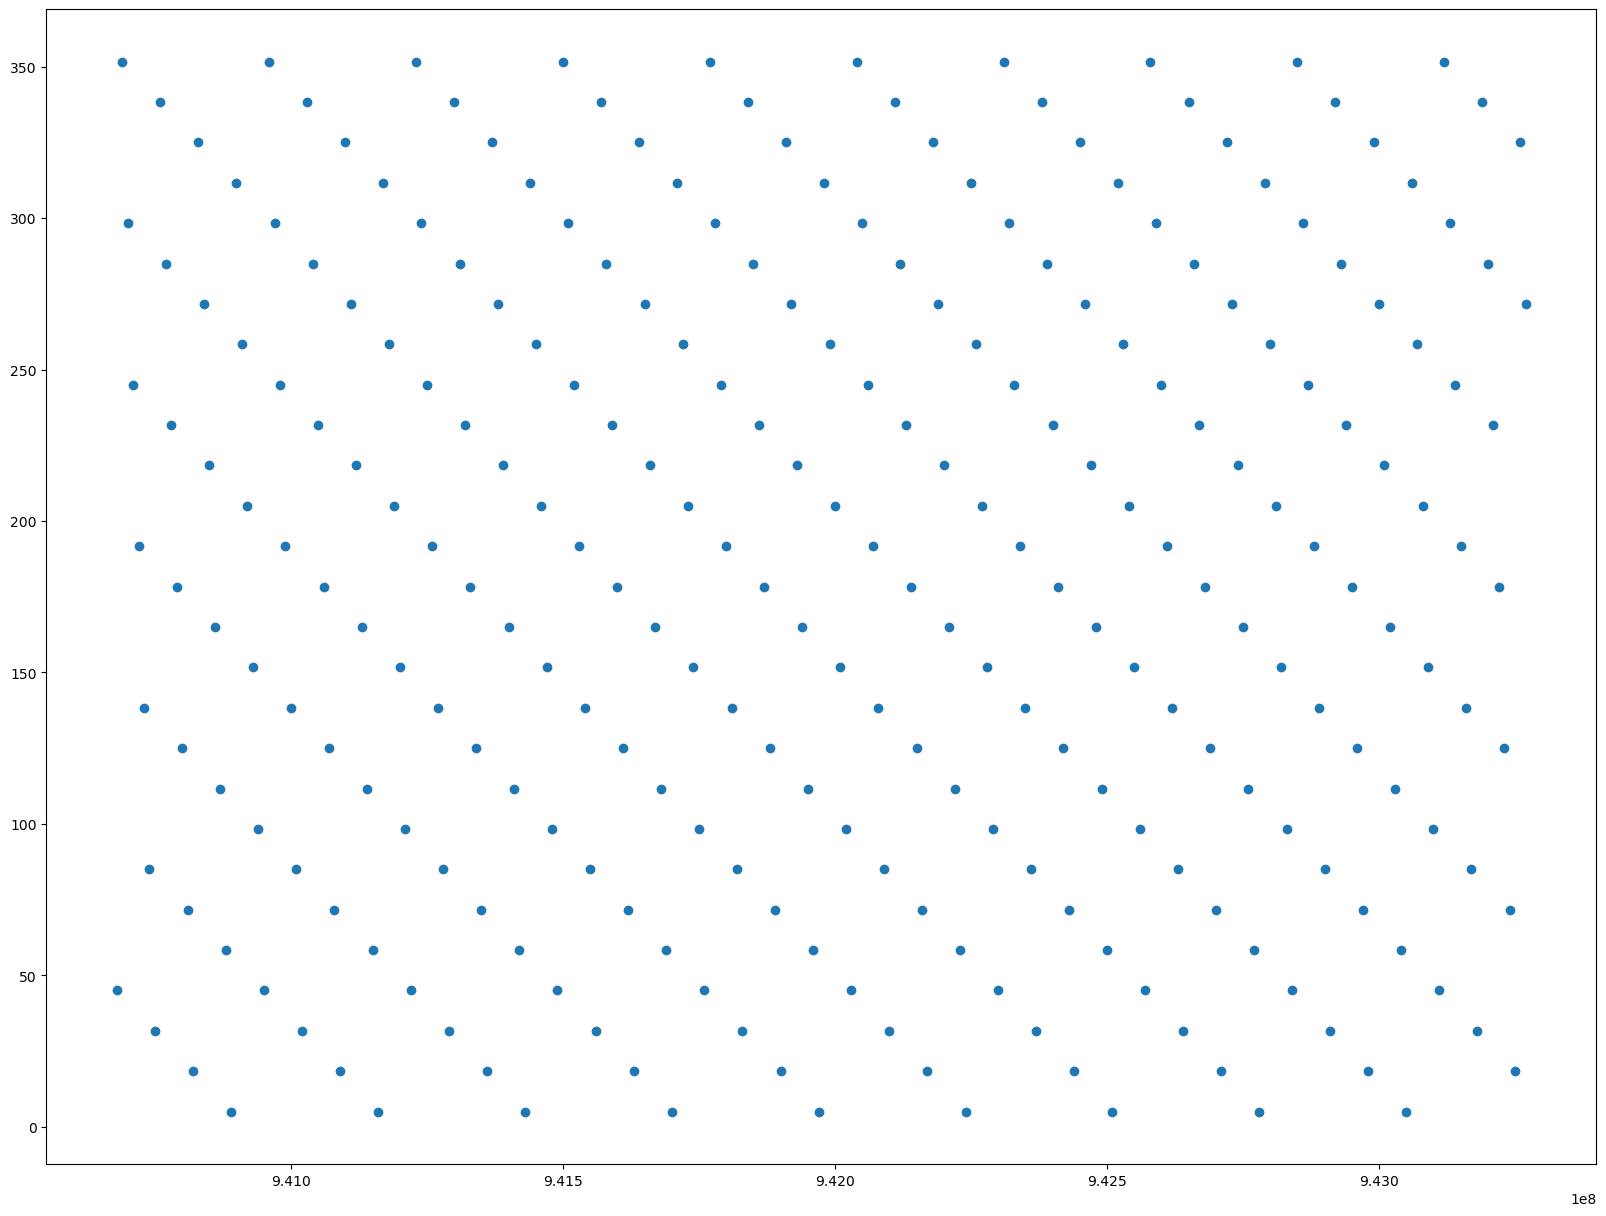

In [16]:
fig, ax = plt.subplots(1, 1)
ax.plot(data[0][::100000],data[2][::100000],'o')
plt.show()

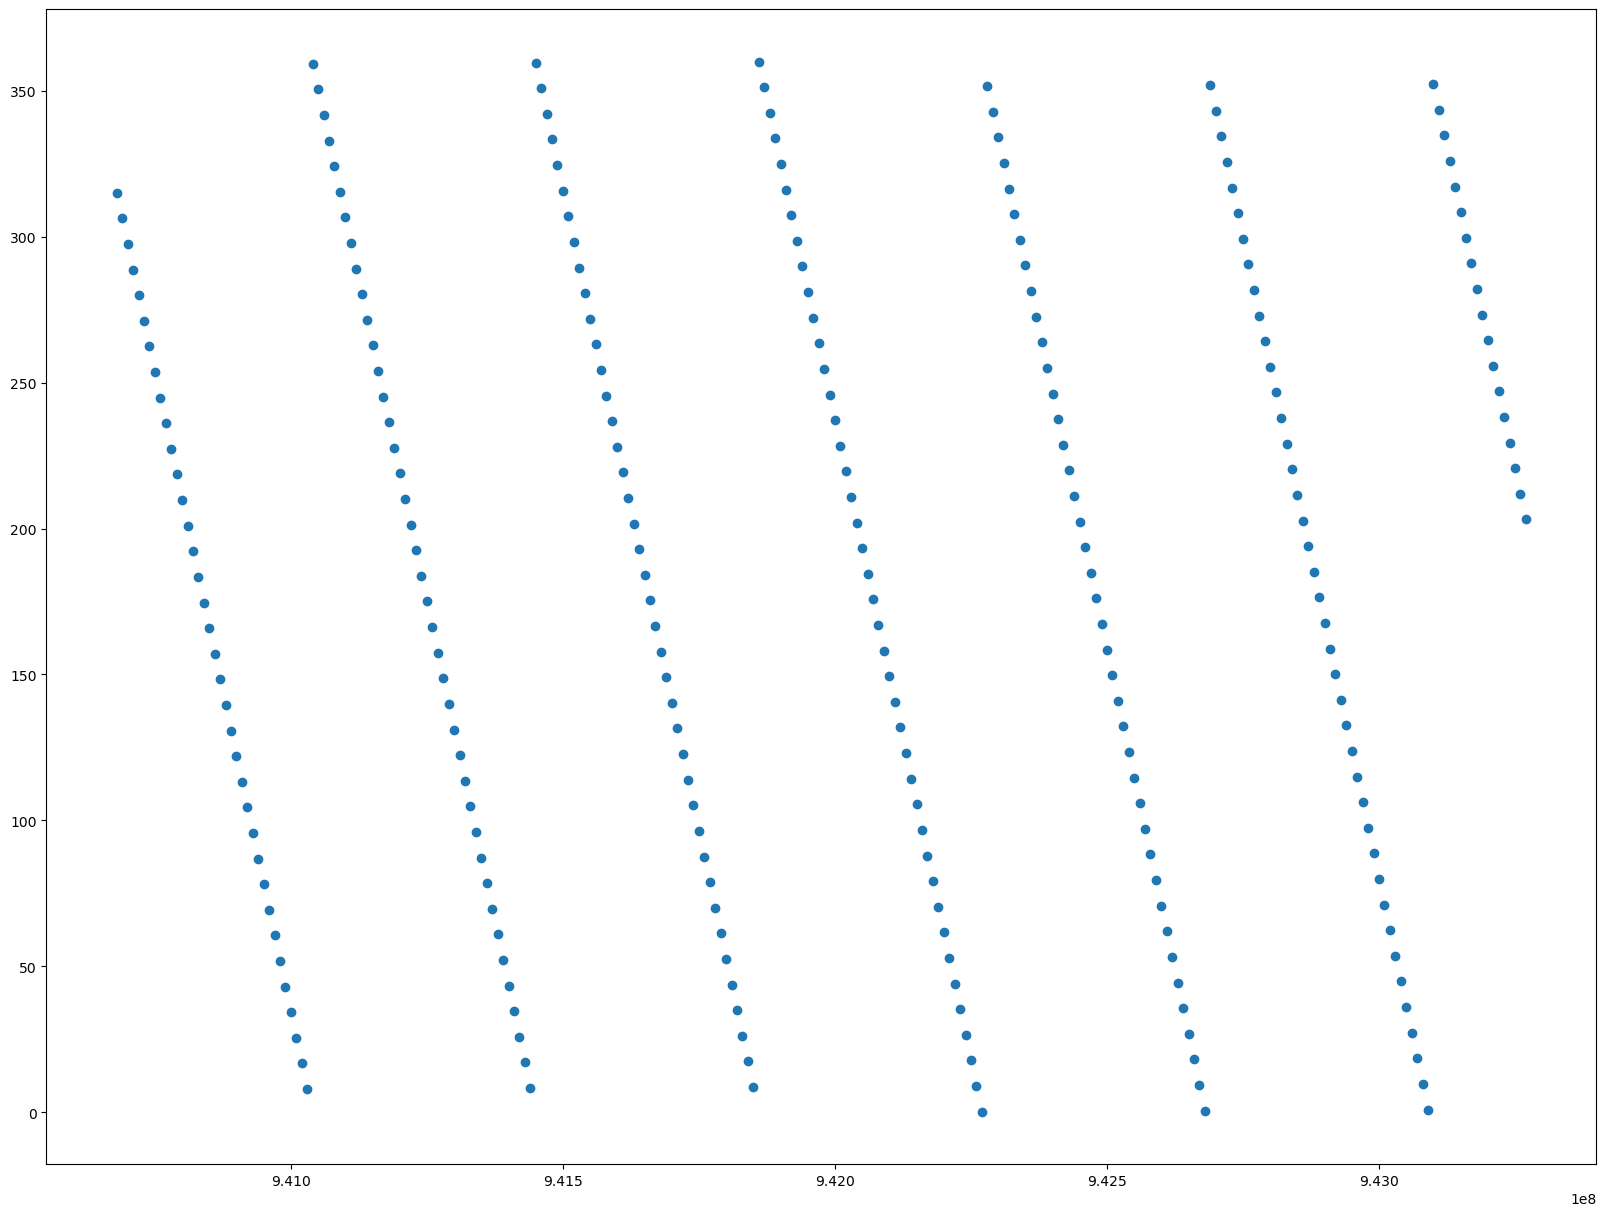

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(data[0][::100000],data[1][::100000],'o')
#plt.colorbar(h[3],ax=ax)
plt.show()

From these plots we have isolated the solar phase and Earth's longitude data  with repsect to time and can see the periodicity of it which then can be used to match it to what is causing the periodic nature of the particle counts. 

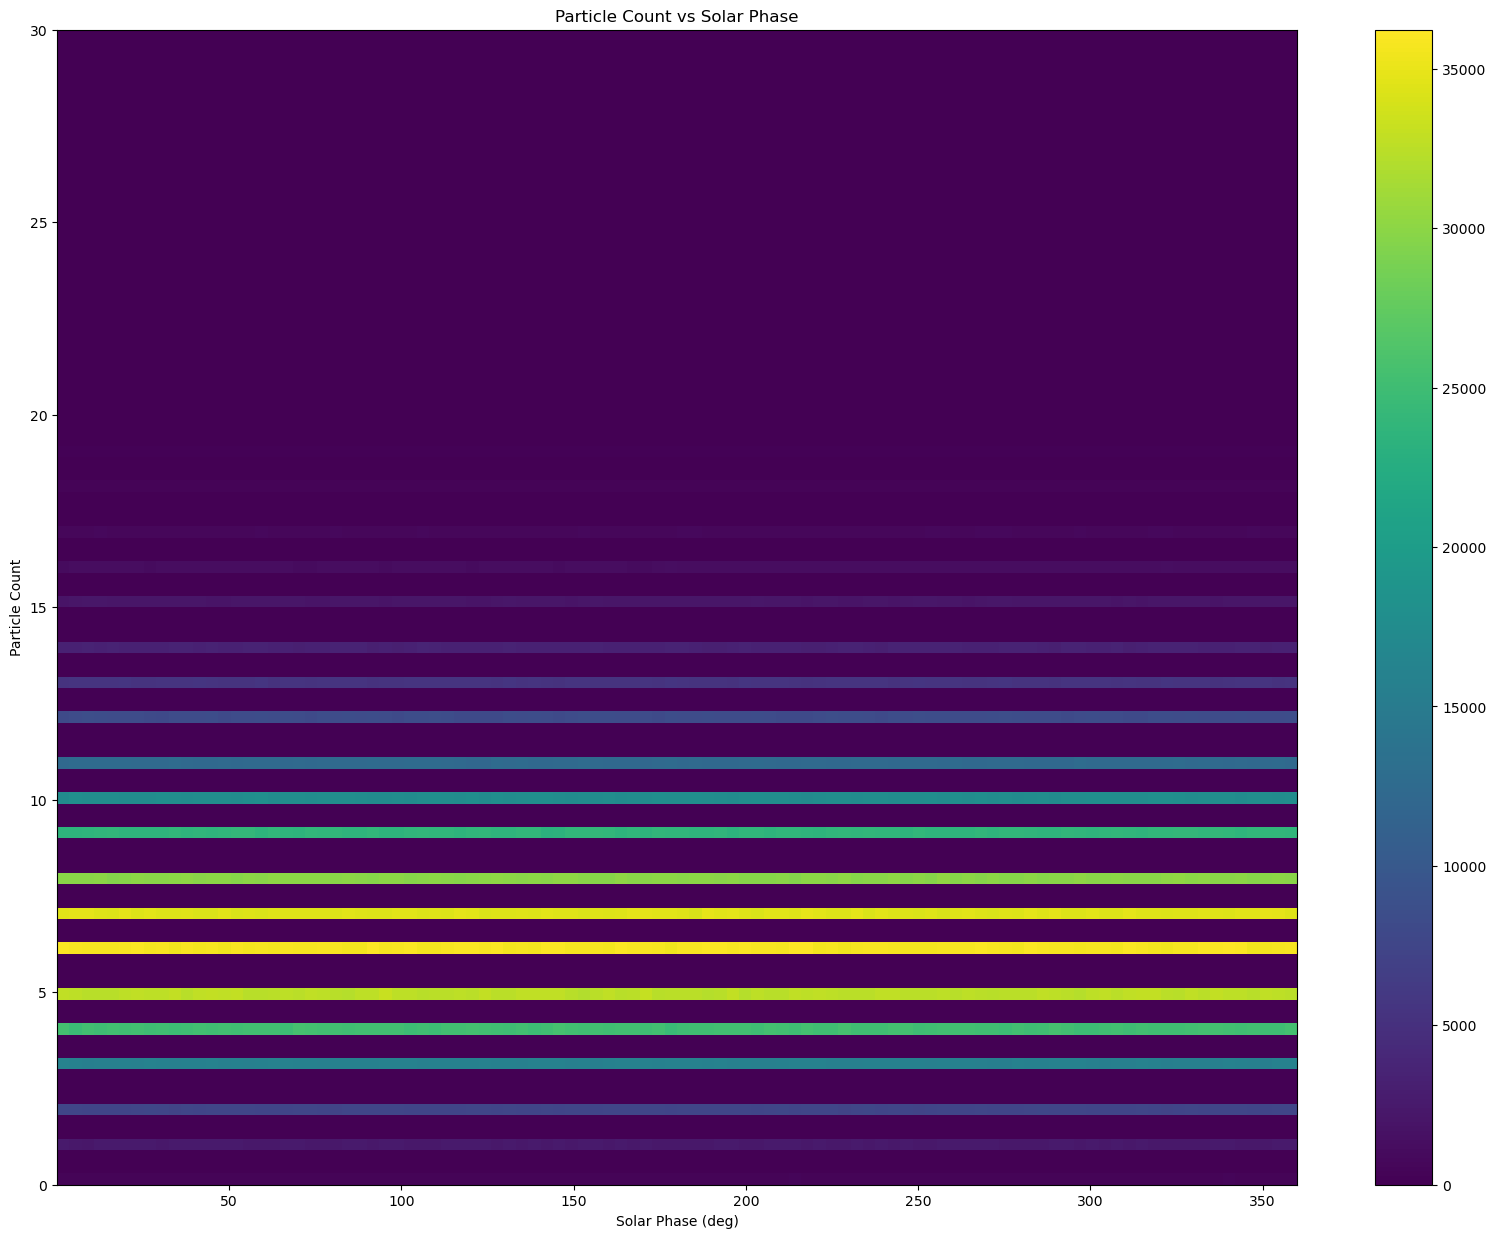

In [18]:
fig, ax = plt.subplots(1, 1)
h=ax.hist2d(data[1],data[3],bins=100)
plt.title("Particle Count vs Solar Phase")
plt.ylabel("Particle Count")
plt.xlabel("Solar Phase (deg)")
plt.colorbar(h[3],ax=ax)
plt.show()

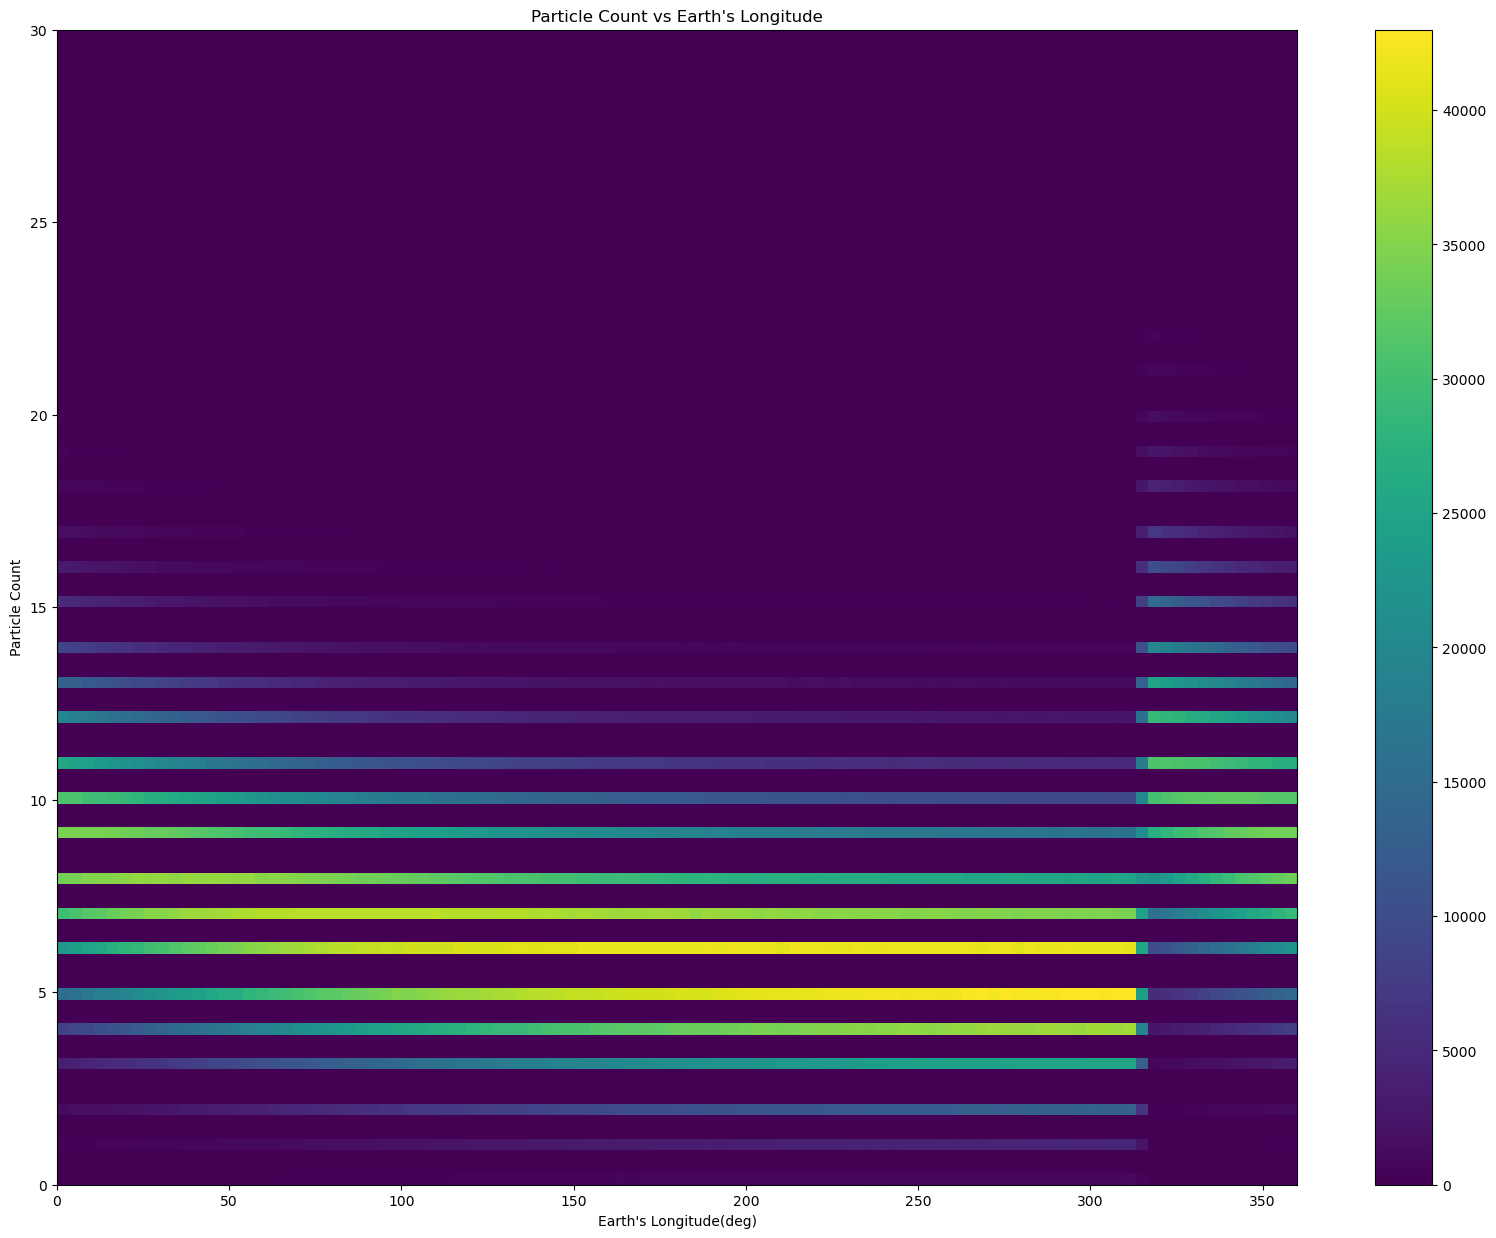

In [19]:
fig, ax = plt.subplots(1, 1)
h=ax.hist2d(data[2],data[3],bins=100)
plt.title("Particle Count vs Earth's Longitude")
plt.ylabel("Particle Count")
plt.xlabel("Earth's Longitude(deg)")
plt.colorbar(h[3],ax=ax)
plt.show()

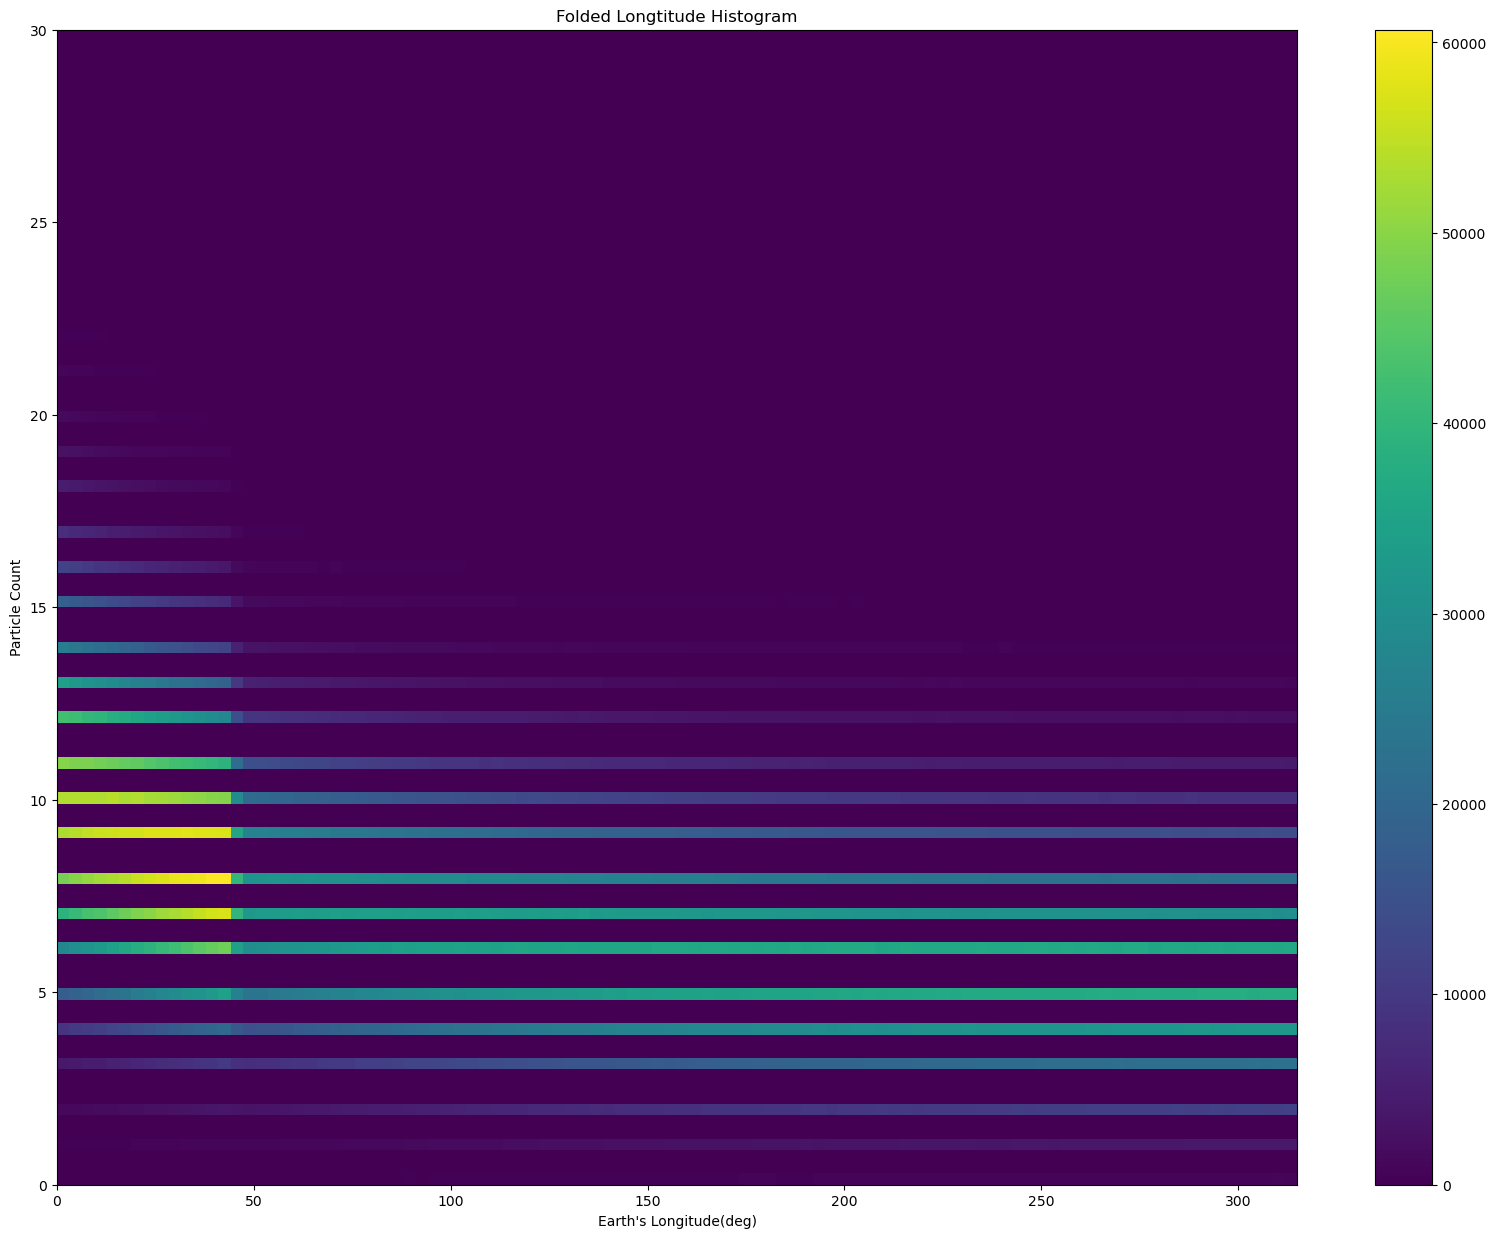

In [20]:
fig, ax = plt.subplots(1, 1)
h=ax.hist2d(data[2]%315,data[3],bins=100)
plt.title("Folded Longtitude Histogram")
plt.ylabel("Particle Count")
plt.xlabel("Earth's Longitude(deg)")
plt.colorbar(h[3],ax=ax)
plt.show()

By plotting these 2d histogrmas of longitude and solar phase vs the particle counts we can start to get an idea for the background distribution. From these plots we can see the particle counts are dependent on the Earth's longitude and not on solar phase. The longtiudinal depency runs on a cycle of about every 315 degrees in the orbit. This allows to determine the time dependecy associated with this longitude cycle and where to examine the data that isnt affected by the longitdue which runs from about 50 degrees to 300 degrees. 

In [15]:
no_spike= (long > 50) & (long < 315)

In [16]:
t_new= t[no_spike]
count_new=counts[no_spike]

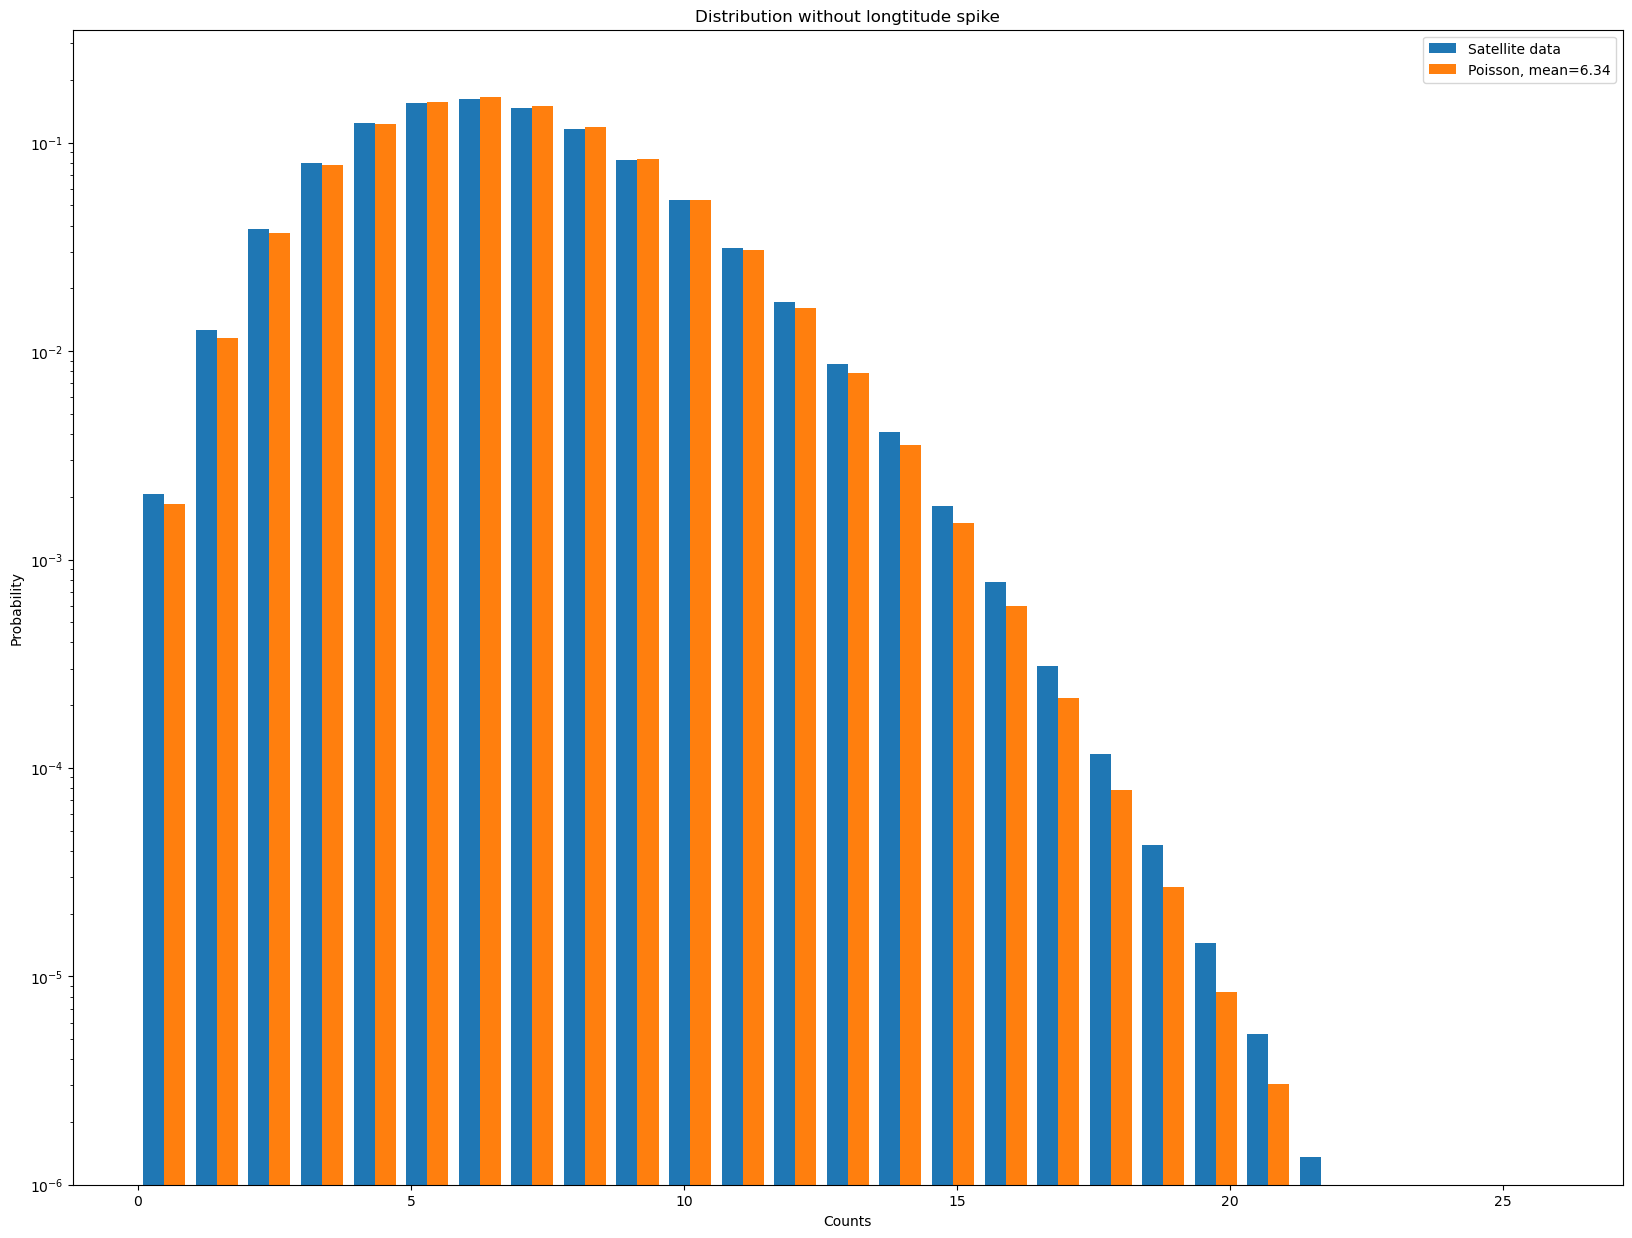

In [17]:
plt.title(f"Distribution without longtitude spike")
plt.xlabel('Counts')
plt.ylabel('Probability')
mean = np.mean(count_new)
vals = stats.poisson(mean).rvs(len(count_new))
plt.hist([count_new, vals], bins=27, density=True)
plt.yscale('log')
plt.ylim(1e-6, None)
plt.legend(['Satellite data', f"Poisson, mean={mean.round(2)}"]);

By looking at the areas that aren't affected by the longitude we are able to plot an accurate distribution of the background which closely resembles that of a poission distribution with a mean of about 6.3. 

To determine the 5 sigma threshold at different times we can look at this threshold when the distribution is and isnt affected by the earth's longitude. 

In [18]:
stats.poisson(mean).ppf(stats.norm.cdf(5))

22.0

For the region that is not affected by the Earth's longitude the distribtuion has a 5 sigma threshold of 22 counts per 1 millisecond.

In [19]:
t_spike= t[np.invert(no_spike)]
count_spike=counts[np.invert(no_spike)]

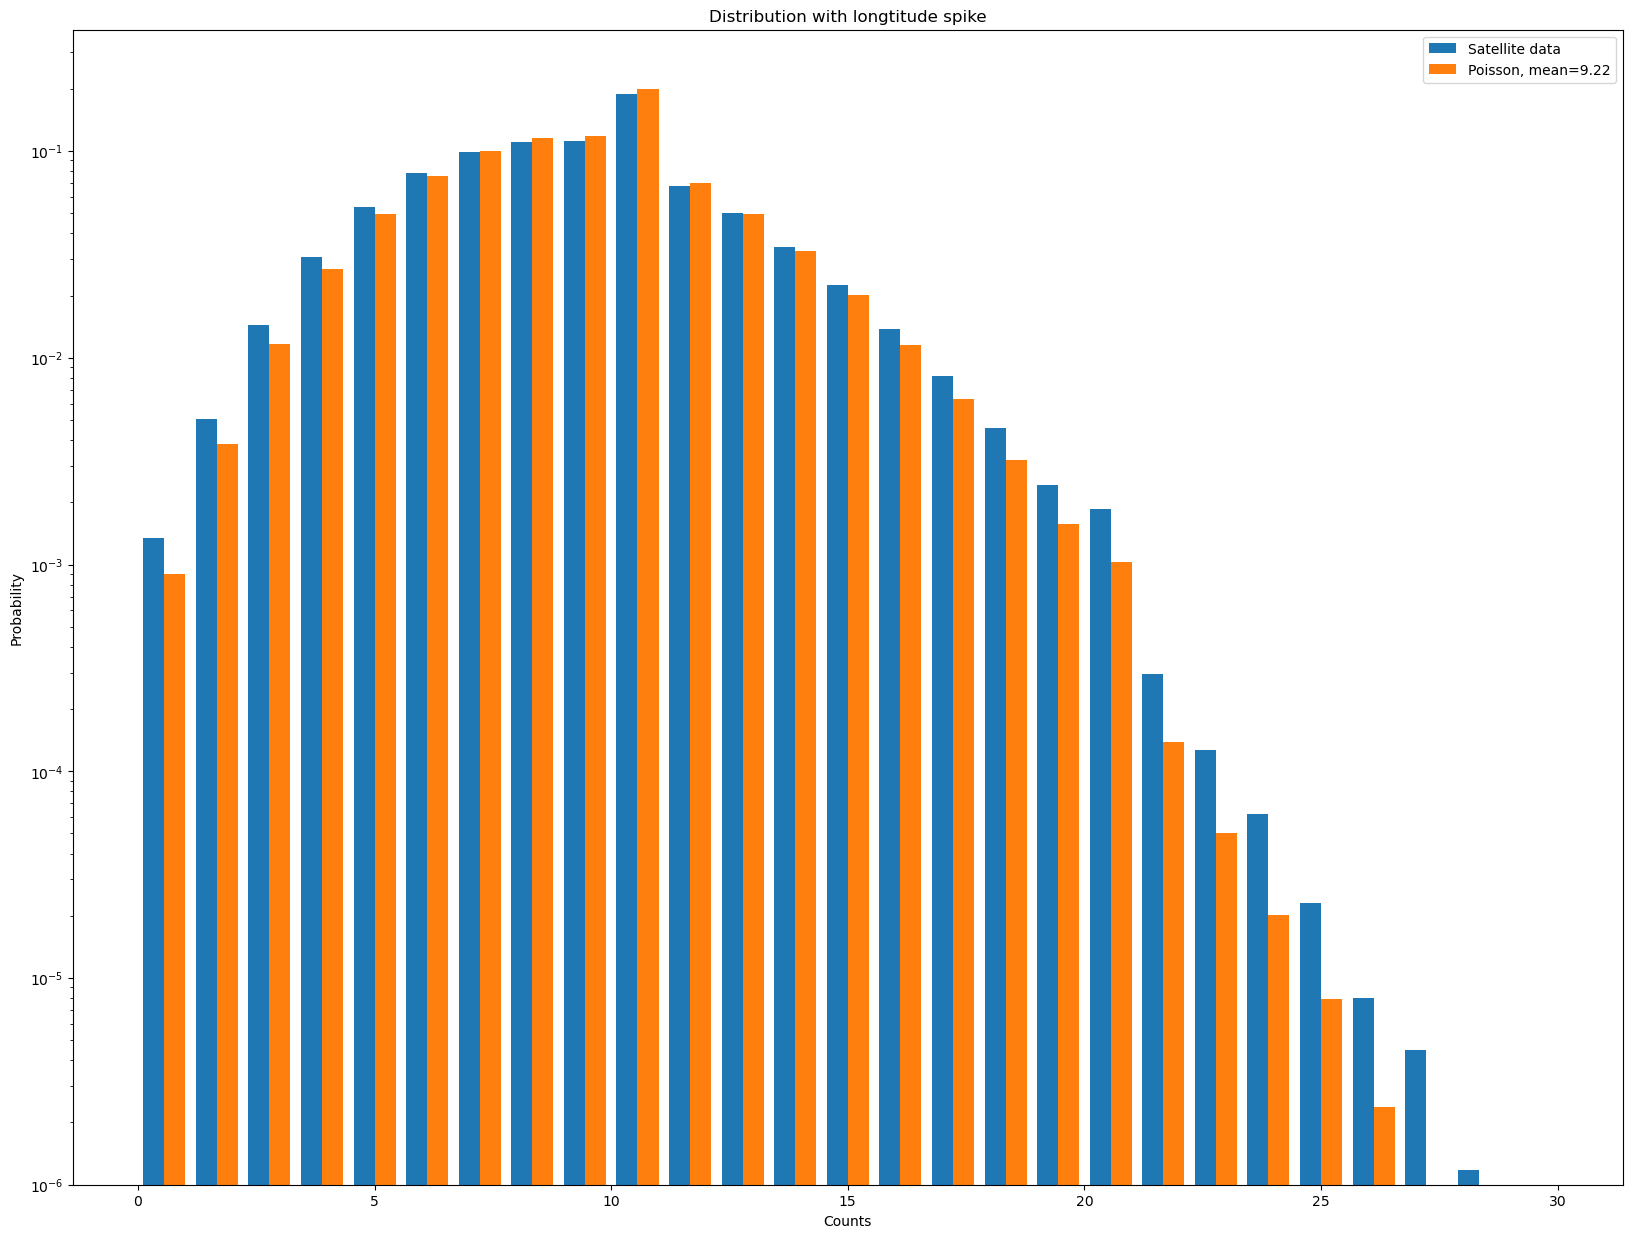

In [20]:
plt.title(f"Distribution with longtitude spike")
plt.xlabel('Counts')
plt.ylabel('Probability')
spike_mean = np.mean(count_spike)
vals = stats.poisson(spike_mean).rvs(len(count_spike))
plt.hist([count_spike, vals], bins=27, density=True)
plt.yscale('log')
plt.ylim(1e-6, None)
plt.legend(['Satellite data', f"Poisson, mean={spike_mean.round(2)}"]);

In [21]:
stats.poisson(spike_mean).ppf(stats.norm.cdf(5))

28.0

By looking at the areas that are affected by the longitude we are able to plot an accurate distribution of the background which closely resembles that of a poission distribution with a mean of about 9.2. 
For this region that is affected by the Earth's longitude the distribtuion has a 5 sigma threshold that is increased to 28 counts per 1 millisecond. This makes sense since there is a spike in counts within this region thus increasing the threshold that would be considered a significant detection. 

## Problem 2

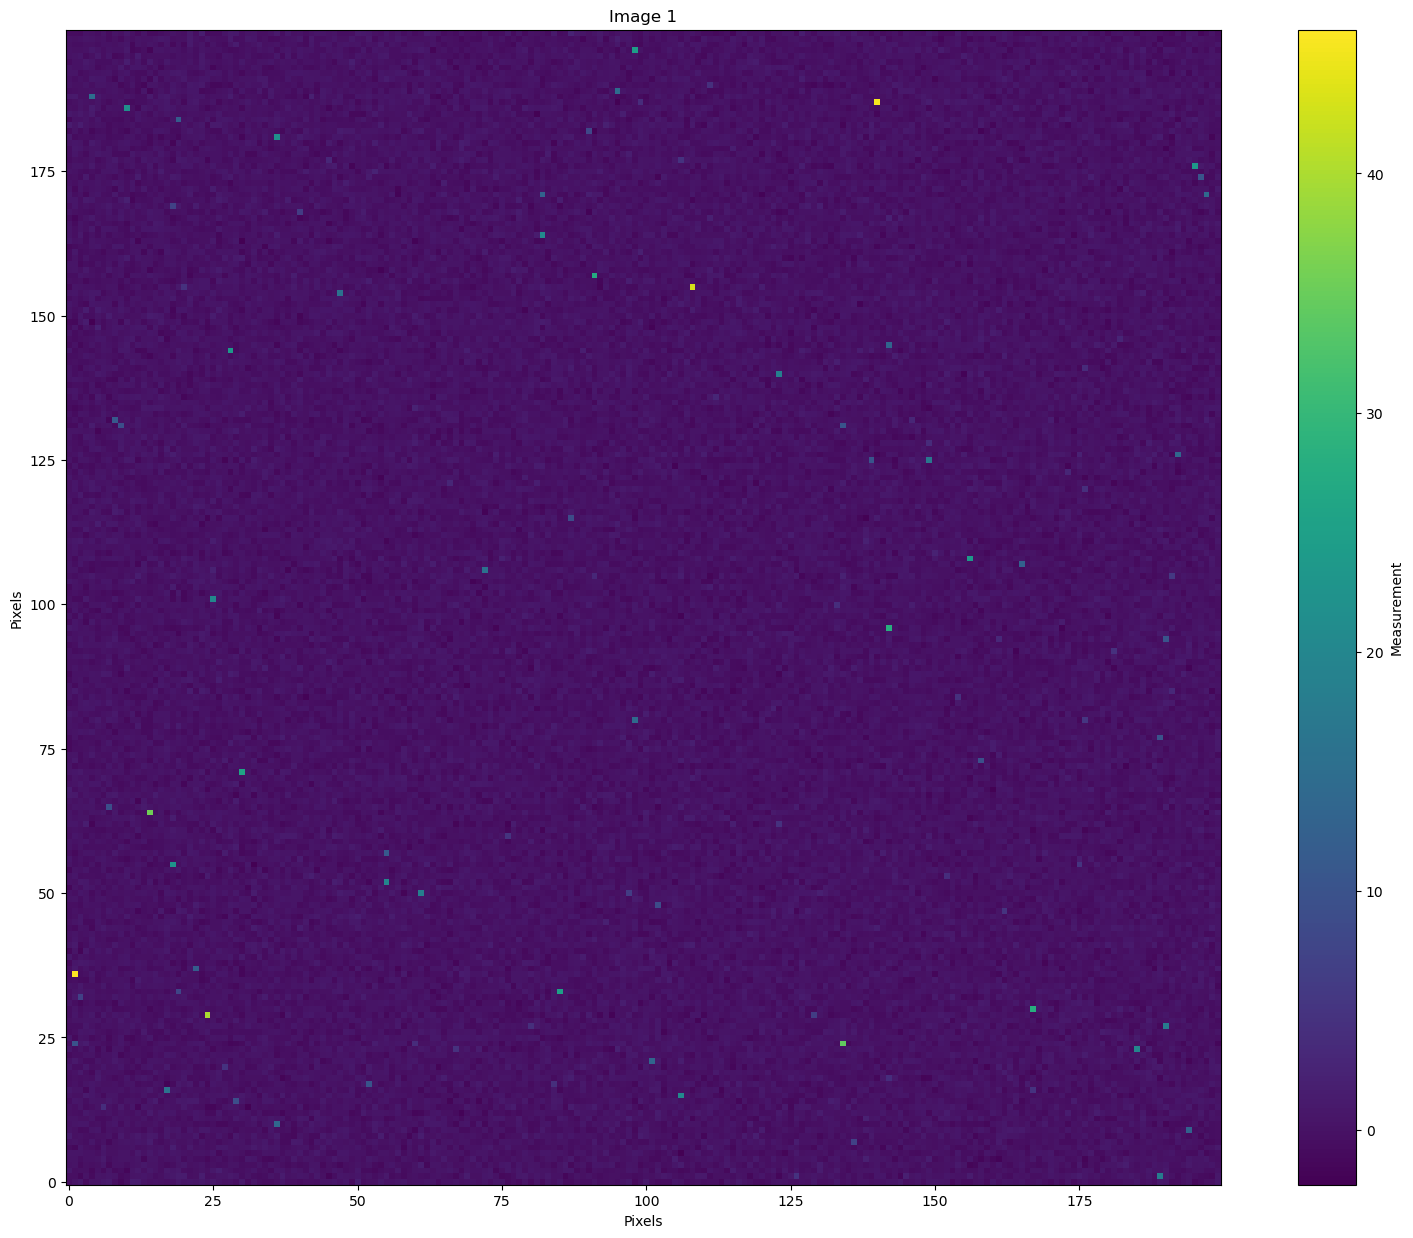

In [22]:
with h5py.File('images.h5', 'r') as hf:
    img = np.array(hf.get('imagestack'))

plt.title('Image 1')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.imshow(img[:, :, 0], origin='lower')
cbar = plt.colorbar()
cbar.set_label('Measurement')

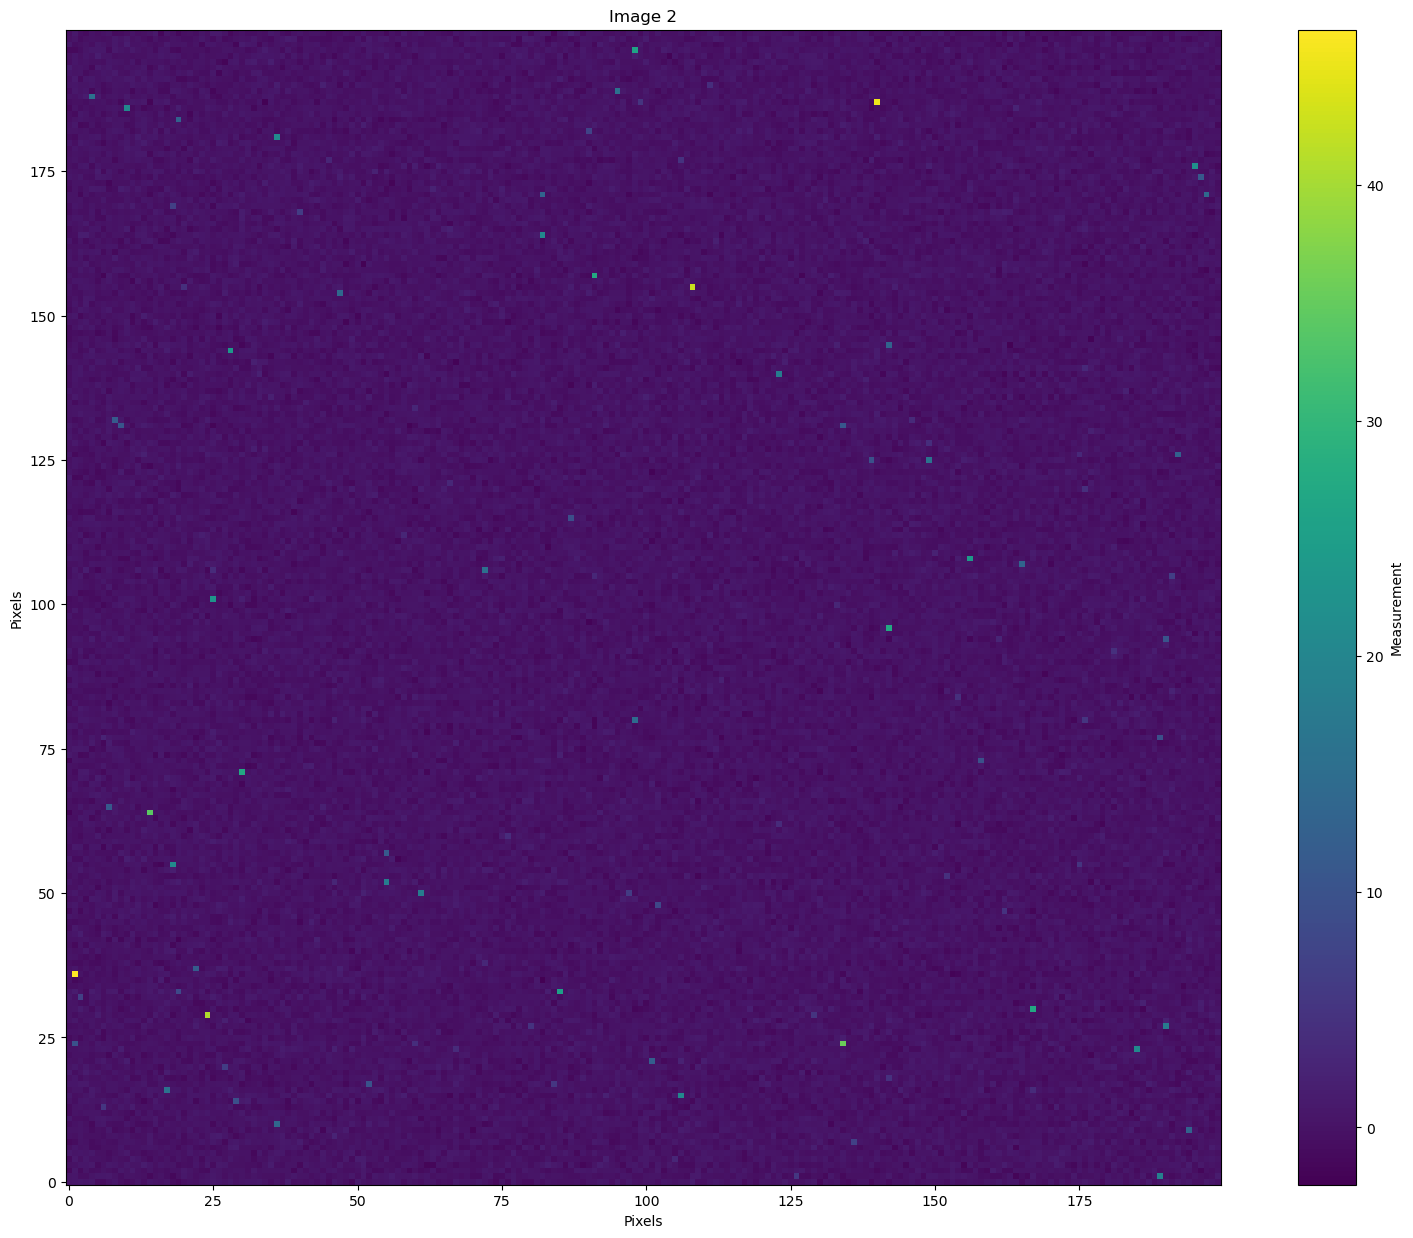

In [23]:
plt.title('Image 2')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.imshow(img[:, :, 1], origin='lower')
cbar = plt.colorbar()
cbar.set_label('Measurement')

In reference to the background the stars in the image would be considered signal contamination. When looking for the faintest stars the stars will be constant across the image but the background will change becuase this is caused by noise from the instrument, therefore making the background time dependent across all the images. 

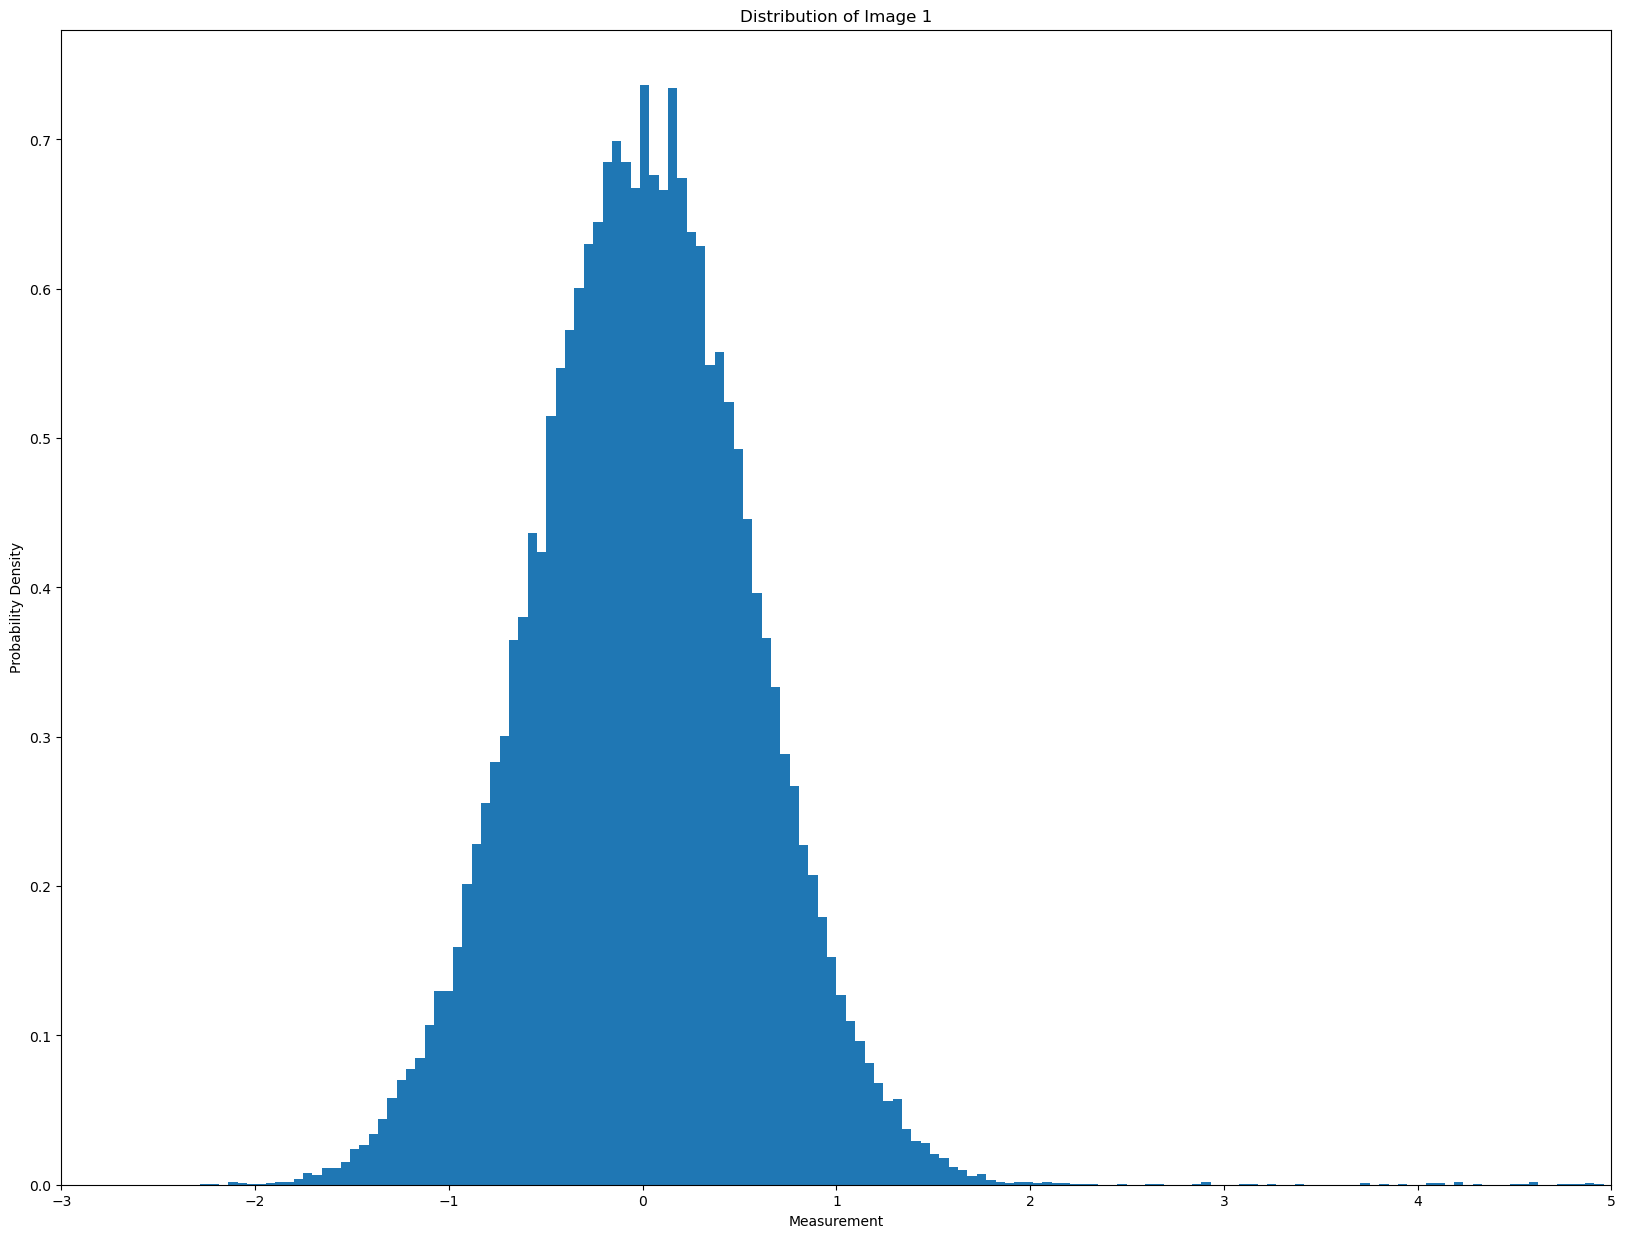

In [26]:
plt.title('Distribution of Image 1')
plt.xlabel('Measurement')
plt.ylabel('Probability Density')
plt.xlim(-3,5)
image1_measurements = img[:, :, 0].flatten()
plt.hist(image1_measurements, bins=1000, density=True);

By plotting the distribution of the first image we can see the main distribution is similar to a zero mean gaussian with a bit of signal that goes outside of this main distribution which could be considered the signal contamination. Overall the iamge is consistent spatially. 

In [27]:
bkgd= (img[:, :, 1]-img[:, :, 0]).flatten()

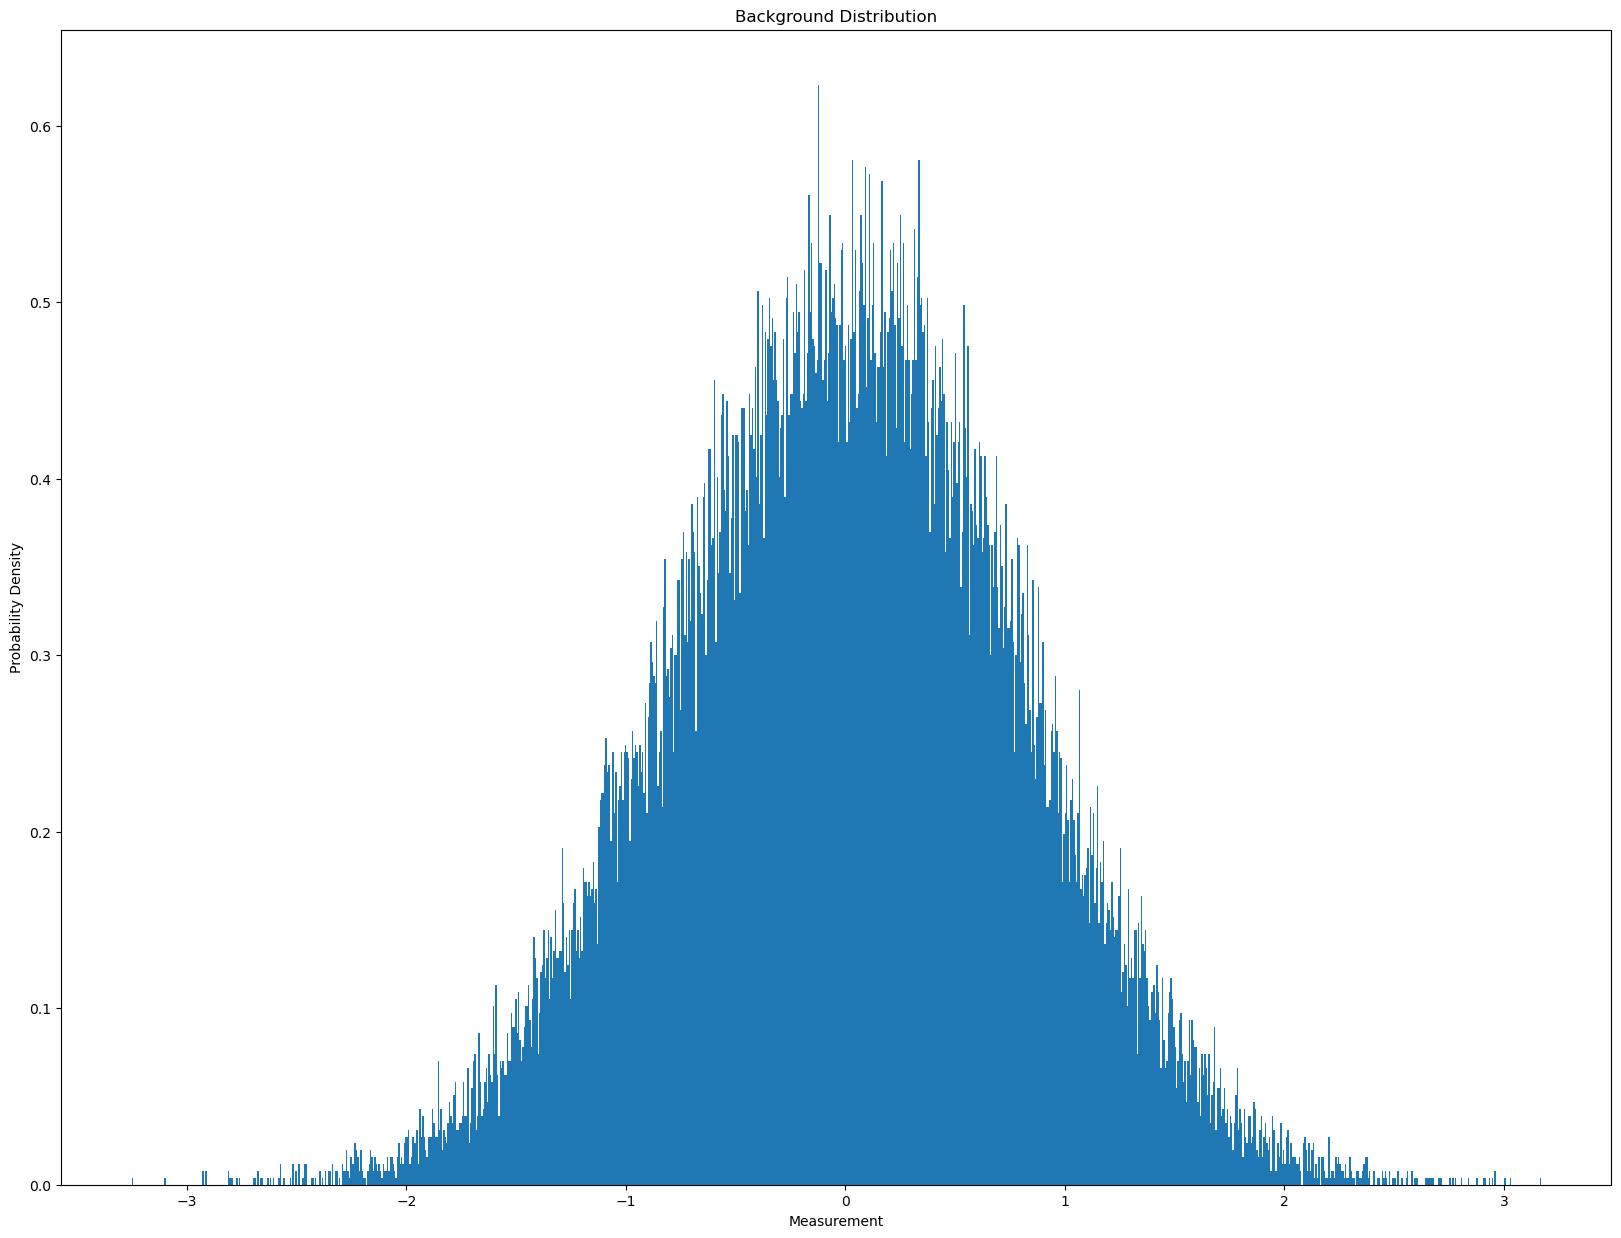

In [29]:
plt.title('Background Distribution')
plt.xlabel('Measurement')
plt.ylabel('Probability Density')
plt.hist(bkgd, bins=1000, density=True);

To determine the pdf of the background we can take two images and subtract one from the other which removes the signal contamination caused by the stars. This is due to the fact that since the faint stars are constant across the images but the background noise in changing by subtracting them it will result in only the background. The above plot shows the background distribtuion which resembles that of a gaussian. 

In [30]:
stars= image1_measurements-bkgd

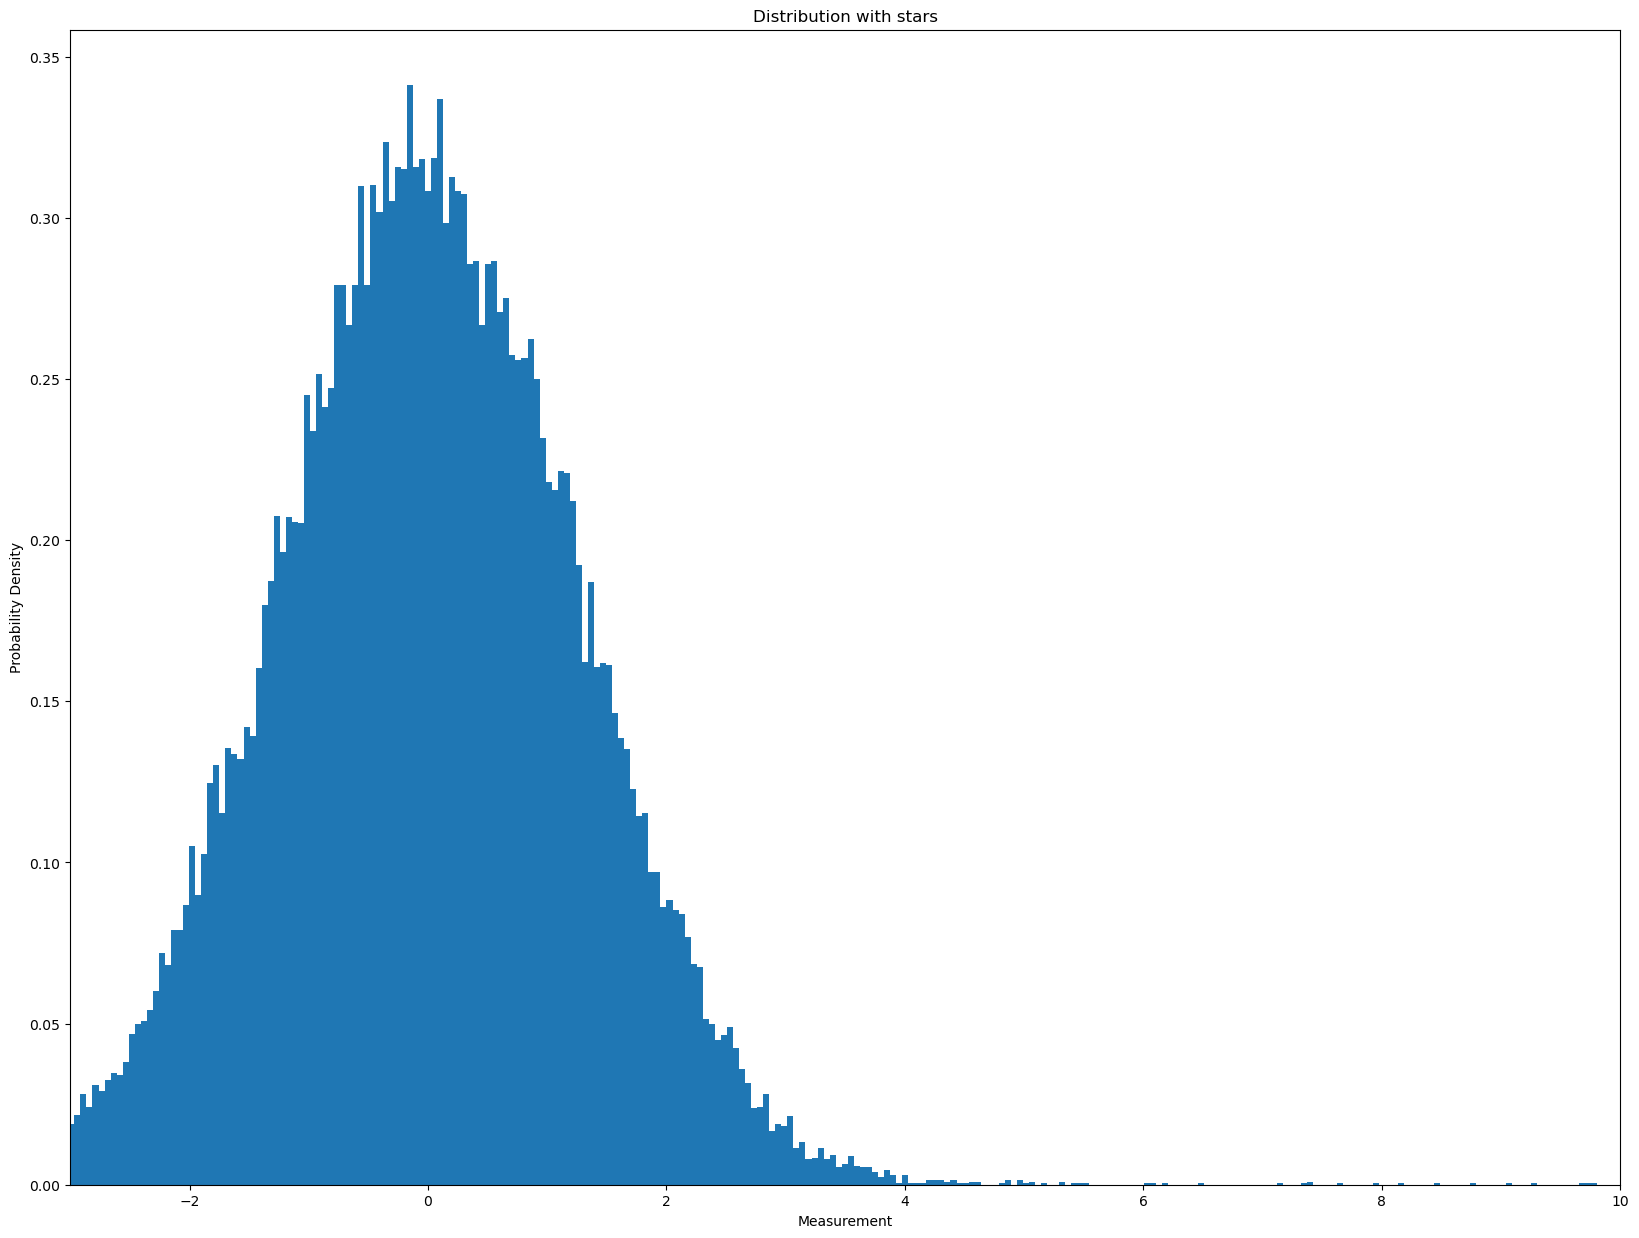

In [32]:
plt.title('Distribution with stars')
plt.xlabel('Measurement')
plt.ylabel('Probability Density')
plt.xlim(-3,10)
plt.hist(stars, bins=1000, density=True);

With our determined background we can now subtract that from one of the images to see the distribution with the stars.

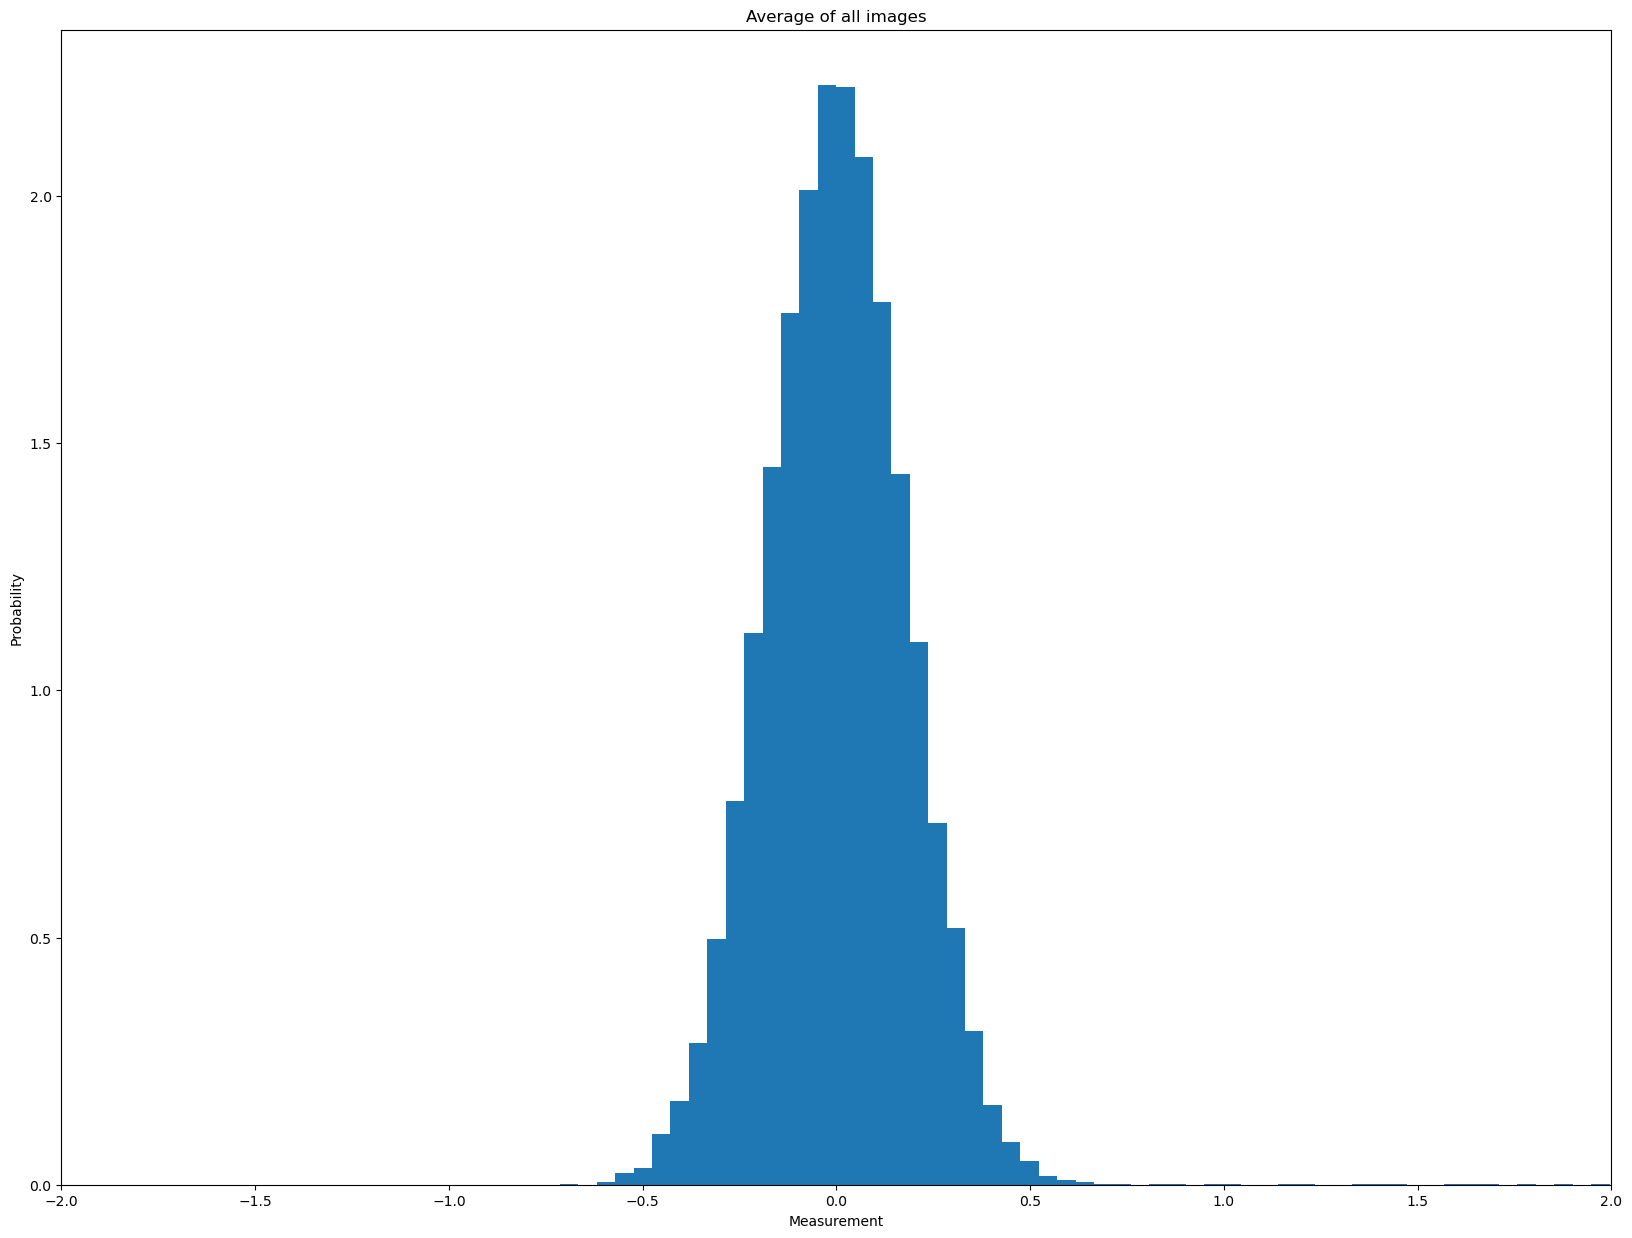

In [35]:
plt.title('Average of all images')
plt.xlabel('Measurement')
plt.ylabel('Probability')
average_img = np.mean(img, axis=2)
plt.xlim(-2,2)
plt.hist(average_img.flatten(), bins=1000, density=True);

In [38]:
mean = np.mean(average_img[average_img <1])
std_dev = np.std(average_img[average_img<1])

In [39]:
threshold5 = stats.norm(mean, std_dev).ppf(stats.norm.cdf(5))
print(threshold5)

0.8890452150305256


In [40]:
faint_star= average_img>threshold5

To find the the faint stars we can take an average all ten images and look at the signals with our determined background look for this signals above a 5 sigma threshold. To do so we would want to look at the region that is part of the main distribution so the region where the measurement is less than one and determine the mean from that region to calculate a the threshold. 

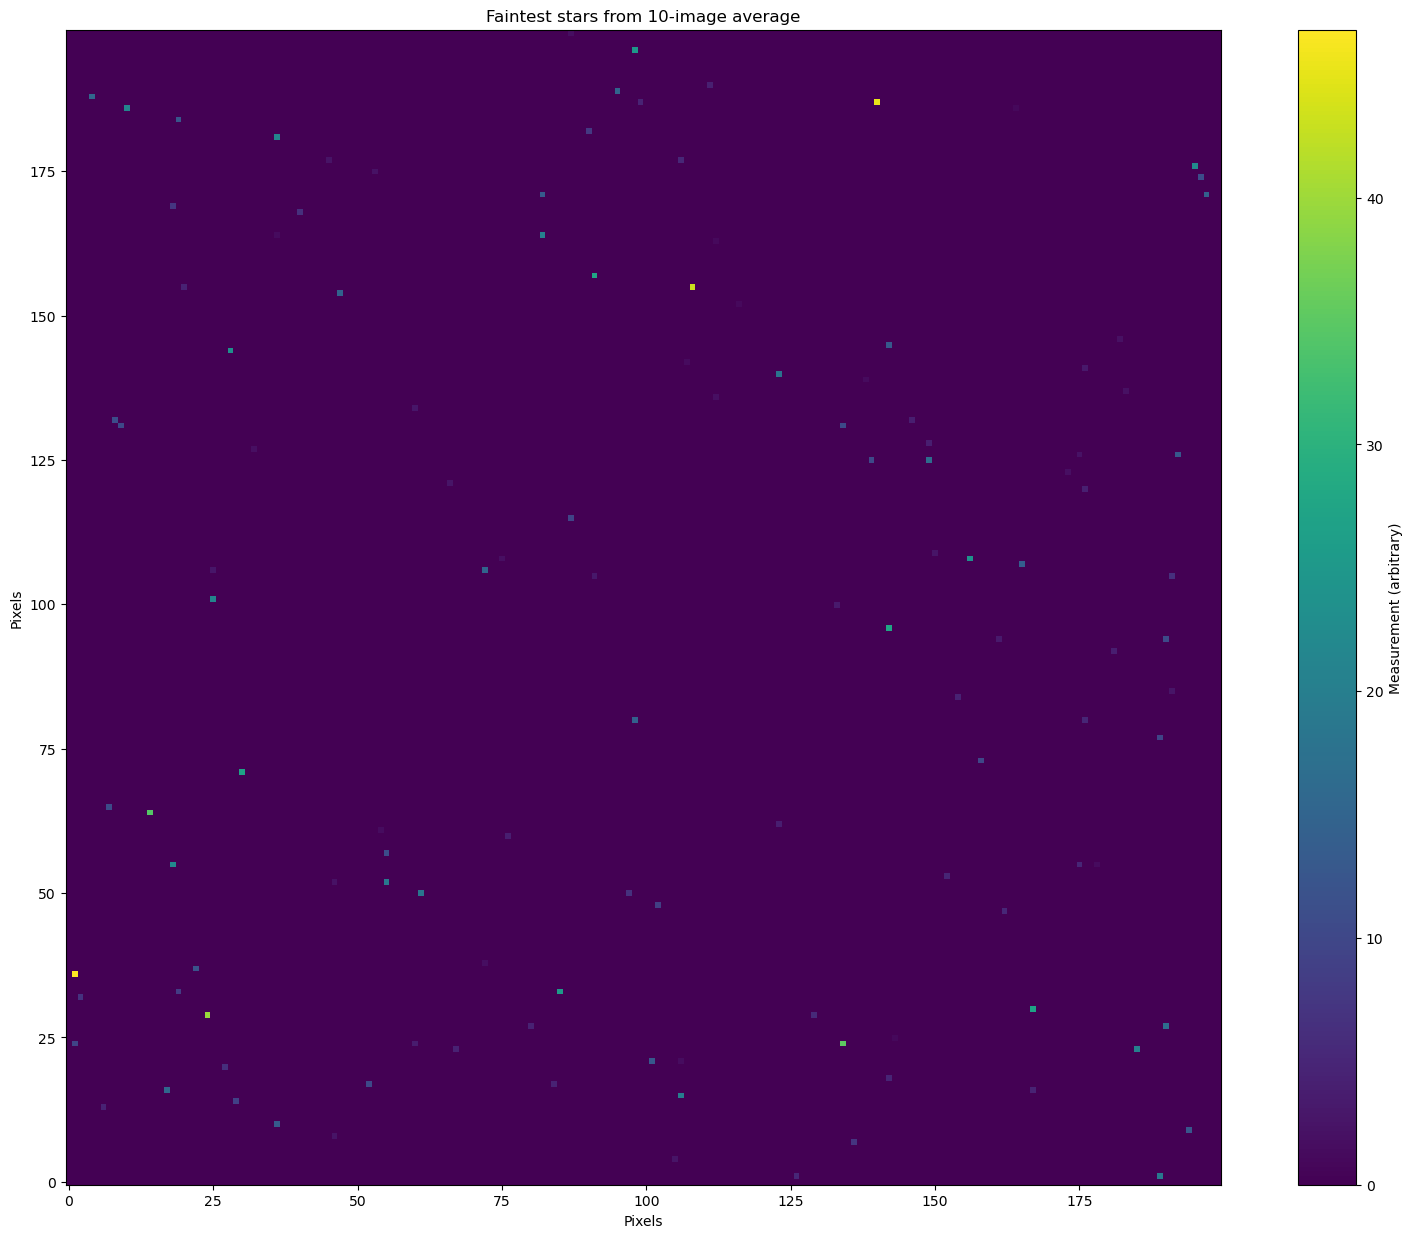

In [41]:
plt.title('Faintest stars from 10-image average')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.imshow(average_img * faint_star, origin='lower')
cbar = plt.colorbar()
cbar.set_label('Measurement (arbitrary)')

By looking at the detections with greater than our 5 sigma threshold of about 0.88 we are able to pick out the faintest stars within the average of all ten images. This results in a much smoother looking background from the noise being removed and only the stars remaining. Even though the same data was used when searching for transient or faint stars this would result in a different pdf due to how these objects are searched for. With faint stars these are constant across all the images allowing us to isolate them on an average of the images while transients would only be found in particualr images and thus the differences would have to be looked for creating a different distribution. 